Name: Sandip Regmi

Labpartner(s): Rocio, Dwight

In [1]:
#import statements go here
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

# Class 7.2

Note I am adding my pronouns (she/her) to my zoom name in solidarity with my LGBTQ+ students and colleagues and to create a more comfortable working environment for all of us. For more information on this practice, see the National Science Foundation (NSF) sponsored program Ulearning Racism in Geoscience (URGE, https://urgeoscience.org/, @Urgeoscience) session on Why Pronouns? https://youtu.be/BNIHQEAQhW4.

More plotting today, ocean modeling style

# Warmups 7.2

**W.1** Do the **exercises** in 1.4.1.5 Indexing and Slicing in the scipy lecture notes. http://scipy-lectures.org/intro/numpy/array_object.html#id2

In [2]:
#The items of an array can be accessed and assigned to the same way as other Python sequences


In [3]:
a = np.arange(20)
a

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

In [4]:
#okay, now reversal pattern we can print by
a[::-1]

array([19, 18, 17, 16, 15, 14, 13, 12, 11, 10,  9,  8,  7,  6,  5,  4,  3,
        2,  1,  0])

In [5]:
#for mutlidimensional array
a = np.diag(np.arange(5))
a

array([[0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 0, 2, 0, 0],
       [0, 0, 0, 3, 0],
       [0, 0, 0, 0, 4]])

In [6]:

a[2,2]


2

In [7]:
a[2,1]

0

In [8]:
a[:3]

array([[0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 0, 2, 0, 0]])

In [9]:
#In 2D, the first dimension corresponds to rows, the second to columns.
#for multidimensional a, a[0] is interpreted by taking all elements in the unspecified dimensions.

In [10]:
#Slicing:  Slicing: Arrays, like other Python sequences can also be sliced:

In [11]:
a = np.arange(10)
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [12]:
a[2:9:3]

array([2, 5, 8])

In [13]:
a[:4]

array([0, 1, 2, 3])

In [14]:
a[1:3]

array([1, 2])

In [15]:
a[::2]

array([0, 2, 4, 6, 8])

In [16]:
a[3:]

array([3, 4, 5, 6, 7, 8, 9])

In [17]:
x = np.arange(10)
x[5:] = 10 #the element after 5 are 10
x

array([ 0,  1,  2,  3,  4, 10, 10, 10, 10, 10])

In [18]:
y = np.arange(5)
x[5:] = y[::-1] #reversal pattern after 5th element of X - we will see the b reverse on 10 10 10 10 10
x

array([0, 1, 2, 3, 4, 4, 3, 2, 1, 0])

In [19]:
np.arange(6) + np.arange(0, 51, 10)[:, np.newaxis]

array([[ 0,  1,  2,  3,  4,  5],
       [10, 11, 12, 13, 14, 15],
       [20, 21, 22, 23, 24, 25],
       [30, 31, 32, 33, 34, 35],
       [40, 41, 42, 43, 44, 45],
       [50, 51, 52, 53, 54, 55]])

In [20]:
a = np.arange(30)
a

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])

In [21]:
a[::-2] #reversal odd number

array([29, 27, 25, 23, 21, 19, 17, 15, 13, 11,  9,  7,  5,  3,  1])

In [22]:
a[1::2] #normal odd number

array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29])

In [23]:
a[::2] #even number

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28])

# Lecture 7.2

### Agenda:

- Questions
- xarray package and plotting netcdf files


### Questions

### Loading and plotting netcdf files using xarray

Most modeling data output is in the form of netcdf files, as they can store more data (in binary) using less memory. Netcdf files are great because they tell you all about what is in the file (the variables and their units) with their metadata, which is kind of like the docstring we made for our function. There are a number of command line (unix-based) utilities for dealing with netcdf files, which I am not planning to cover in this course (though I use these all the time). Hit me up if you want some tutorials on this, or if enough of you are keen I will put some unix tutorials in the schedule.

xarray is a relatively new python package that does analysis and plotting of netcdf files. This is actively being developed by folks like the pangeo consortium (https://pangeo.io), which is creating a number of python utilities for big data geoscience, like dealing with massive amounts of climate model output. There are other packages that can be used for parsing netcdf files, but they are cumbersome and clunky. Trust me, xarray is the best thing since sliced bread for big data geoscience. 

Let's grab some data and start playing with it. We are going to use the HYCOM Gulf of Mexico Analysis output, which is basically weather prediction for our local ocean made by the Navy, freely available. https://www.hycom.org.

In [24]:
import xarray as xr

We want the HYCOM GoM Analysis product: https://www.hycom.org/data/gomu0pt04/expt-90pt1m000

Which we can get using the opendap link (see http://xarray.pydata.org/en/stable/io.html)

In [25]:
# here I am going to grab the forcast they made for 2/22. 
# Note I had to add the http: in front of the opendap link

link = "E:/2020.nc4"

In [26]:
hycom_data = xr.open_dataset(link, decode_times=False)

# honestly I don't know why you need the decode_times bit with open_dataset
# I just know it doesn't work most of the time if you leave it out (bonus token for anyone who figures it out!)

The result is an xarray dataset, which is similar to the pandas dataframes you have been using. It has dimensions, coordinates and variables. The first thing to do when you get a dataset is to figure out what is in it and explore it a bit. 

In [27]:
hycom_data

<xarray.Dataset>
Dimensions:  (lat: 346, lon: 541, time: 1)
Coordinates:
  * time     (time) float64 1.841e+05
  * lat      (lat) float64 18.12 18.16 18.2 18.24 ... 31.8 31.84 31.88 31.92
  * lon      (lon) float64 -98.0 -97.96 -97.92 -97.88 ... -76.48 -76.44 -76.4
Data variables:
    surf_el  (time, lat, lon) float32 ...
Attributes: (12/14)
    classification_level:      UNCLASSIFIED
    distribution_statement:    Approved for public release. Distribution unli...
    downgrade_date:            not applicable
    classification_authority:  not applicable
    institution:               Naval Oceanographic Office
    source:                    HYCOM archive file
    ...                        ...
    Conventions:               CF-1.6 NAVO_netcdf_v1.1
    History:                   Translated to CF-1.0 Conventions by Netcdf-Jav...
    geospatial_lat_min:        18.1200008392334
    geospatial_lat_max:        31.920000076293945
    geospatial_lon_min:        -98.0
    geospatial_lon_max:        -76.4000244140625

In [28]:
# what is the time increment? Let's look at the metadata for the time coordinate

hycom_data.time

# looks like it's in hours and so this is hourly. 133 hours seems like a weird amount of time!

<xarray.DataArray 'time' (time: 1)>
array([184115.])
Coordinates:
  * time     (time) float64 1.841e+05
Attributes:
    long_name:            Valid Time
    units:                hours since 2000-01-01 00:00:00
    time_origin:          2000-01-01 00:00:00
    calendar:             gregorian
    axis:                 T
    NAVO_code:            13
    _CoordinateAxisType:  Time

In [29]:
# what is the lat spacing and domain?

hycom_data.lat

# looks like it goes from 18.12 N to 31.92 N and the spacing is 0.04 degrees. 
# 1 degree is about 100 km, so that's 4 km 

<xarray.DataArray 'lat' (lat: 346)>
array([18.120001, 18.16    , 18.200001, ..., 31.84    , 31.879999, 31.92    ])
Coordinates:
  * lat      (lat) float64 18.12 18.16 18.2 18.24 ... 31.8 31.84 31.88 31.92
Attributes:
    long_name:            Latitude
    standard_name:        latitude
    units:                degrees_north
    point_spacing:        even
    axis:                 Y
    NAVO_code:            1
    _CoordinateAxisType:  Lat

In [30]:
# what about lon?
hycom_data.lon

# 98 W to 76.4 W in approximately 0.04 steps again, so 4 km

<xarray.DataArray 'lon' (lon: 541)>
array([-98.      , -97.960022, -97.919983, ..., -76.47998 , -76.440002,
       -76.400024])
Coordinates:
  * lon      (lon) float64 -98.0 -97.96 -97.92 -97.88 ... -76.48 -76.44 -76.4
Attributes:
    long_name:            Longitude
    standard_name:        longitude
    units:                degrees_east
    point_spacing:        even
    axis:                 X
    NAVO_code:            2
    _CoordinateAxisType:  Lon

### Basic plotting with xarray (not publication ready!)

In [31]:
hycom_data.surf_el # this is time by latxlon, let's plot the first time.

<xarray.DataArray 'surf_el' (time: 1, lat: 346, lon: 541)>
[187186 values with dtype=float32]
Coordinates:
  * time     (time) float64 1.841e+05
  * lat      (lat) float64 18.12 18.16 18.2 18.24 ... 31.8 31.84 31.88 31.92
  * lon      (lon) float64 -98.0 -97.96 -97.92 -97.88 ... -76.48 -76.44 -76.4
Attributes:
    long_name:      Water Surface Elevation
    standard_name:  sea_surface_elevation
    units:          m
    NAVO_code:      32

Note that one of the amazing things about xarray, is that it actually does not go and get the data until you call for it, so this will take a minute to upload.

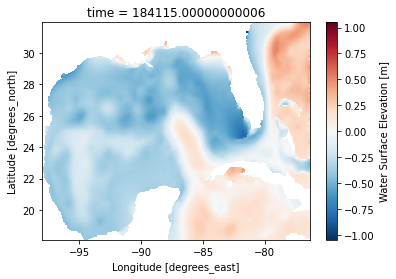

In [32]:
hycom_data.surf_el[0].plot()

Note that xarray, like pandas, uses matplotlib for plotting, and that it figured out to use the blue to red colormap based on the type of data. Pretty cool. 

Let's plot some temperature data and see how it compares. Since temperature data is given for the whole depth, we have to select a level.

In [33]:
hycom_data.surf_el#[what do I put here to select the surface?].


<xarray.DataArray 'surf_el' (time: 1, lat: 346, lon: 541)>
[187186 values with dtype=float32]
Coordinates:
  * time     (time) float64 1.841e+05
  * lat      (lat) float64 18.12 18.16 18.2 18.24 ... 31.8 31.84 31.88 31.92
  * lon      (lon) float64 -98.0 -97.96 -97.92 -97.88 ... -76.48 -76.44 -76.4
Attributes:
    long_name:      Water Surface Elevation
    standard_name:  sea_surface_elevation
    units:          m
    NAVO_code:      32

Those plots are really small. I like to change the default matplotlib preferences to make my plots bigger.

In [34]:
# change all the defaults (usually I stick this up with the import statements)

import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [8.0, 5.0]
mpl.rcParams['figure.dpi'] = 500
mpl.rcParams['savefig.dpi'] = 500

mpl.rcParams['font.size'] = 12
mpl.rcParams['legend.fontsize'] = 'large'
mpl.rcParams['figure.titlesize'] = 'medium'
mpl.rcParams['lines.linewidth']= 2.0

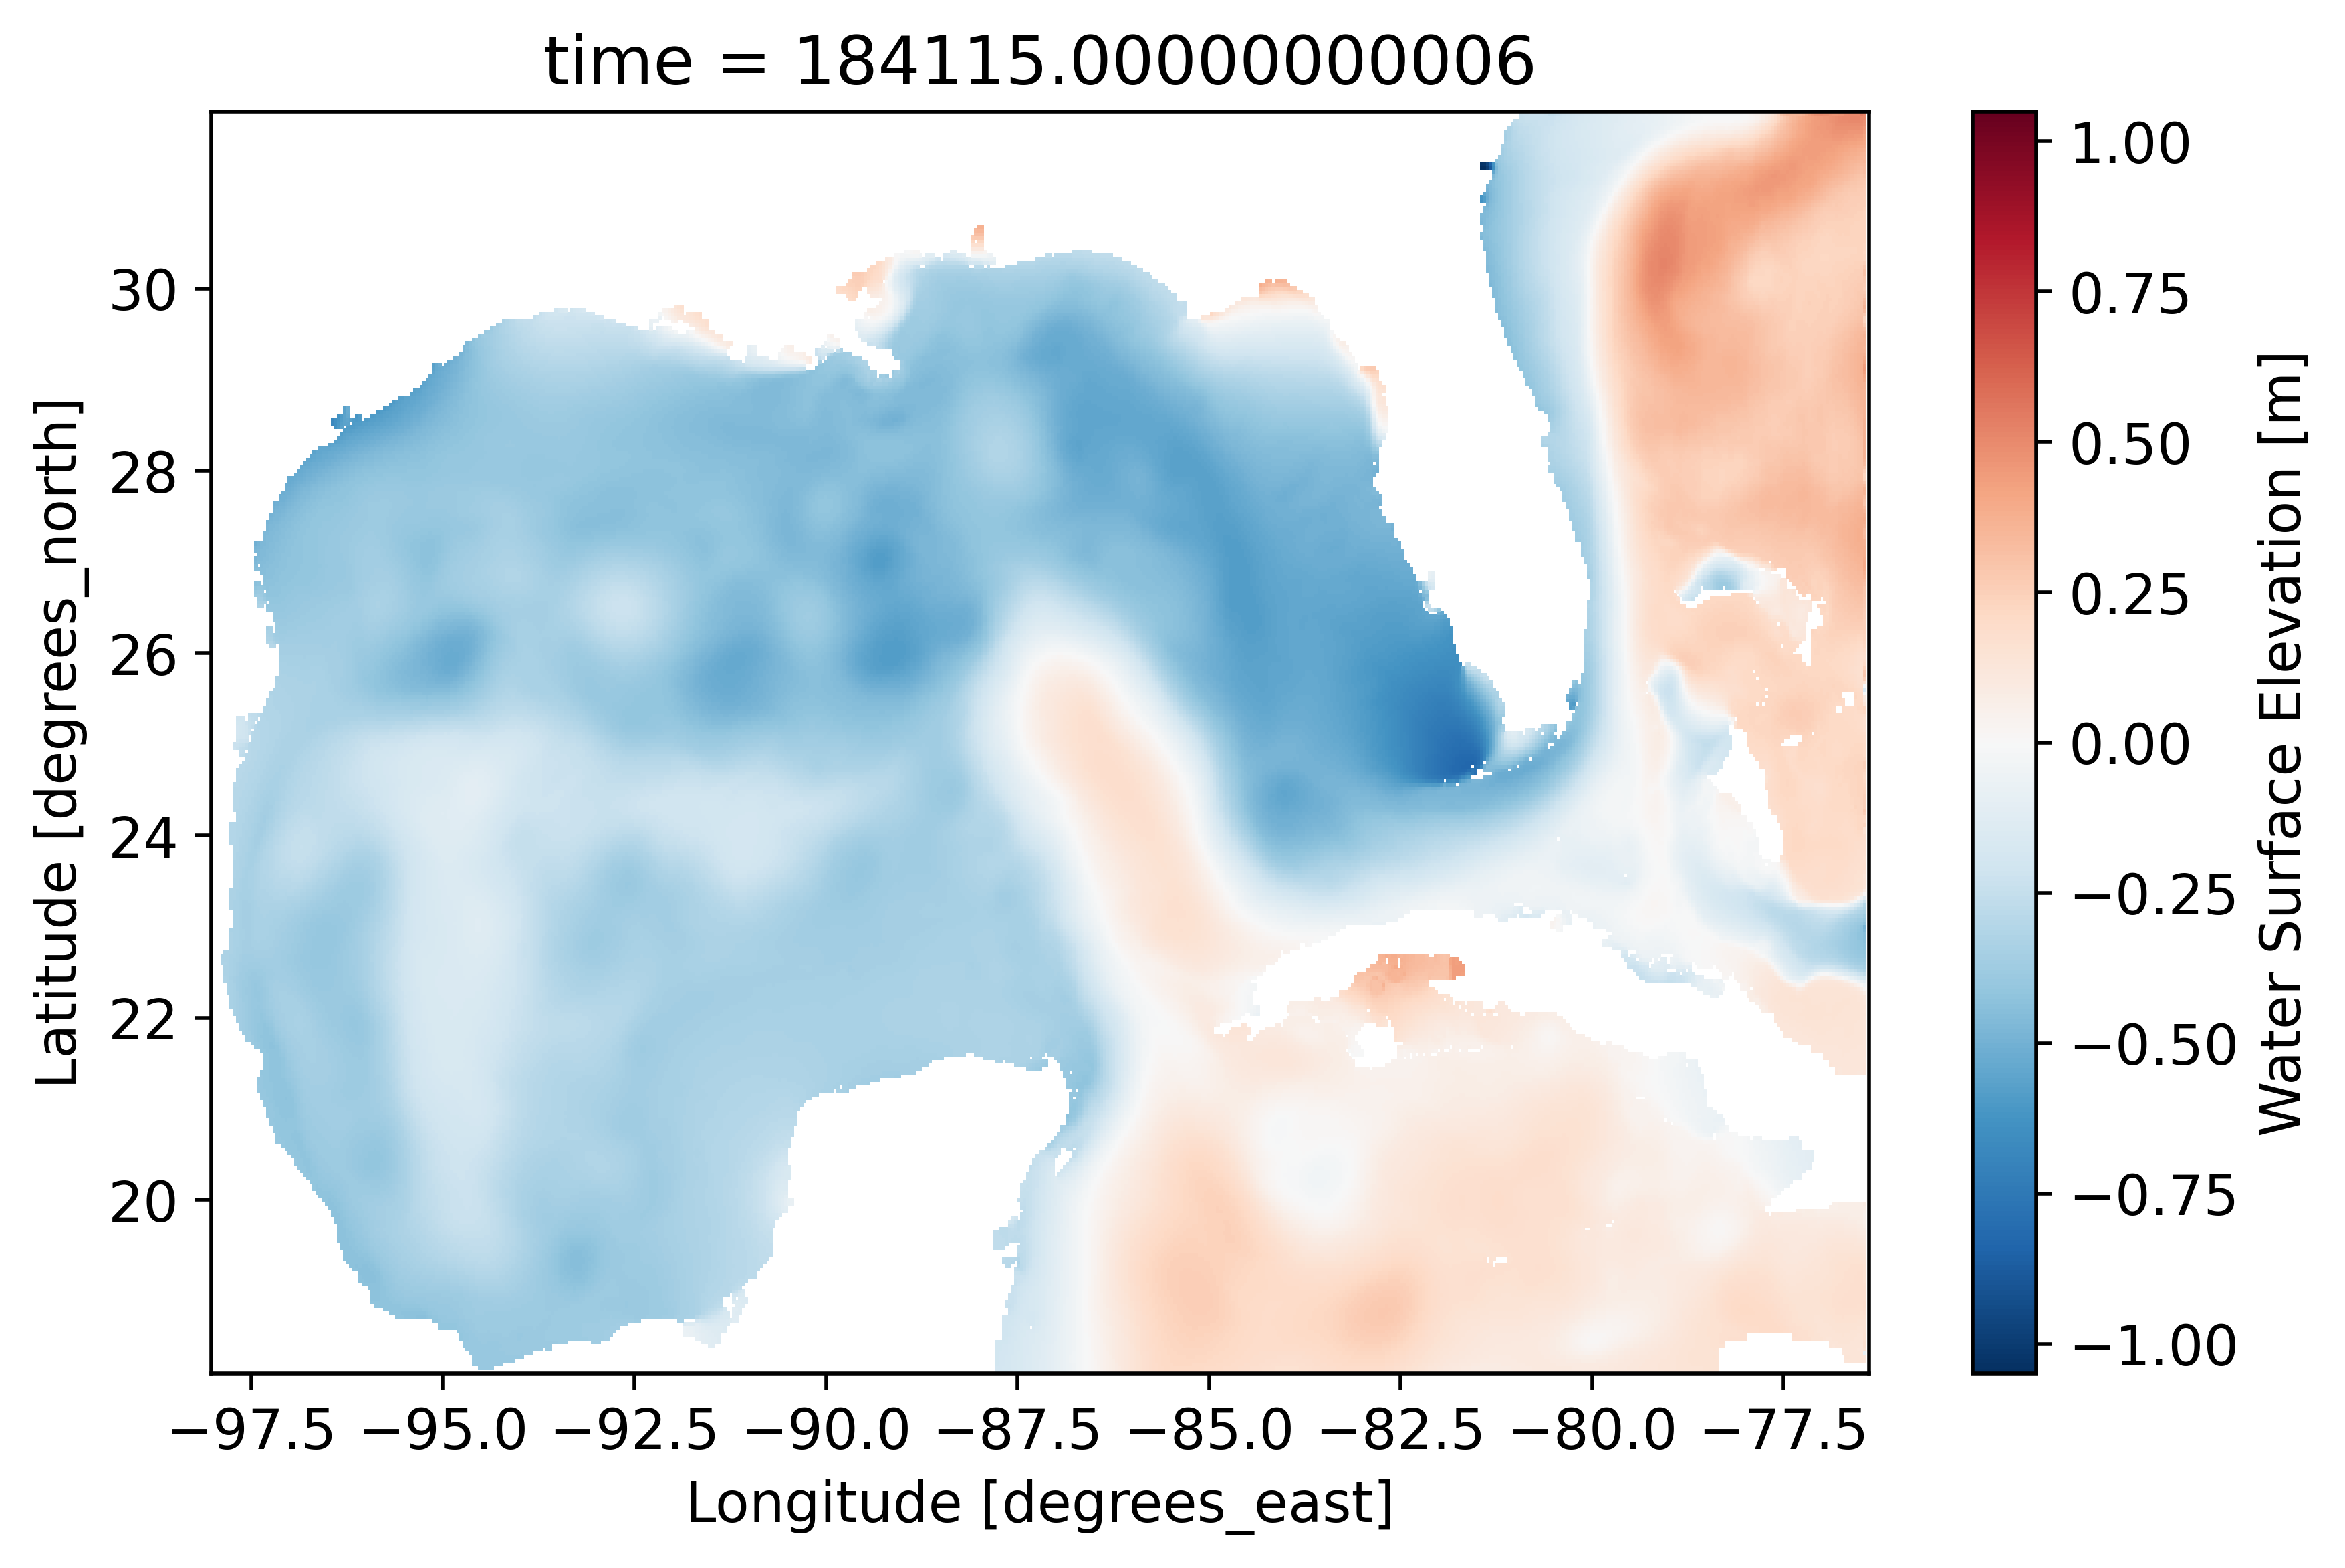

In [35]:
# now it's big and pretty.

hycom_data.surf_el[0].plot()

Note if you know you are going to plot the same bit of data over and over again to fiddle with the plot, you can download the data you need and save it in an array to make the proccess faster.

In [36]:
SSH_0 = hycom_data.surf_el[0]

In [37]:
type(SSH_0)

xarray.core.dataarray.DataArray

In [38]:
SSH_0 # note it saves all the coordinates I need.

<xarray.DataArray 'surf_el' (lat: 346, lon: 541)>
[187186 values with dtype=float32]
Coordinates:
    time     float64 1.841e+05
  * lat      (lat) float64 18.12 18.16 18.2 18.24 ... 31.8 31.84 31.88 31.92
  * lon      (lon) float64 -98.0 -97.96 -97.92 -97.88 ... -76.48 -76.44 -76.4
Attributes:
    long_name:      Water Surface Elevation
    standard_name:  sea_surface_elevation
    units:          m
    NAVO_code:      32

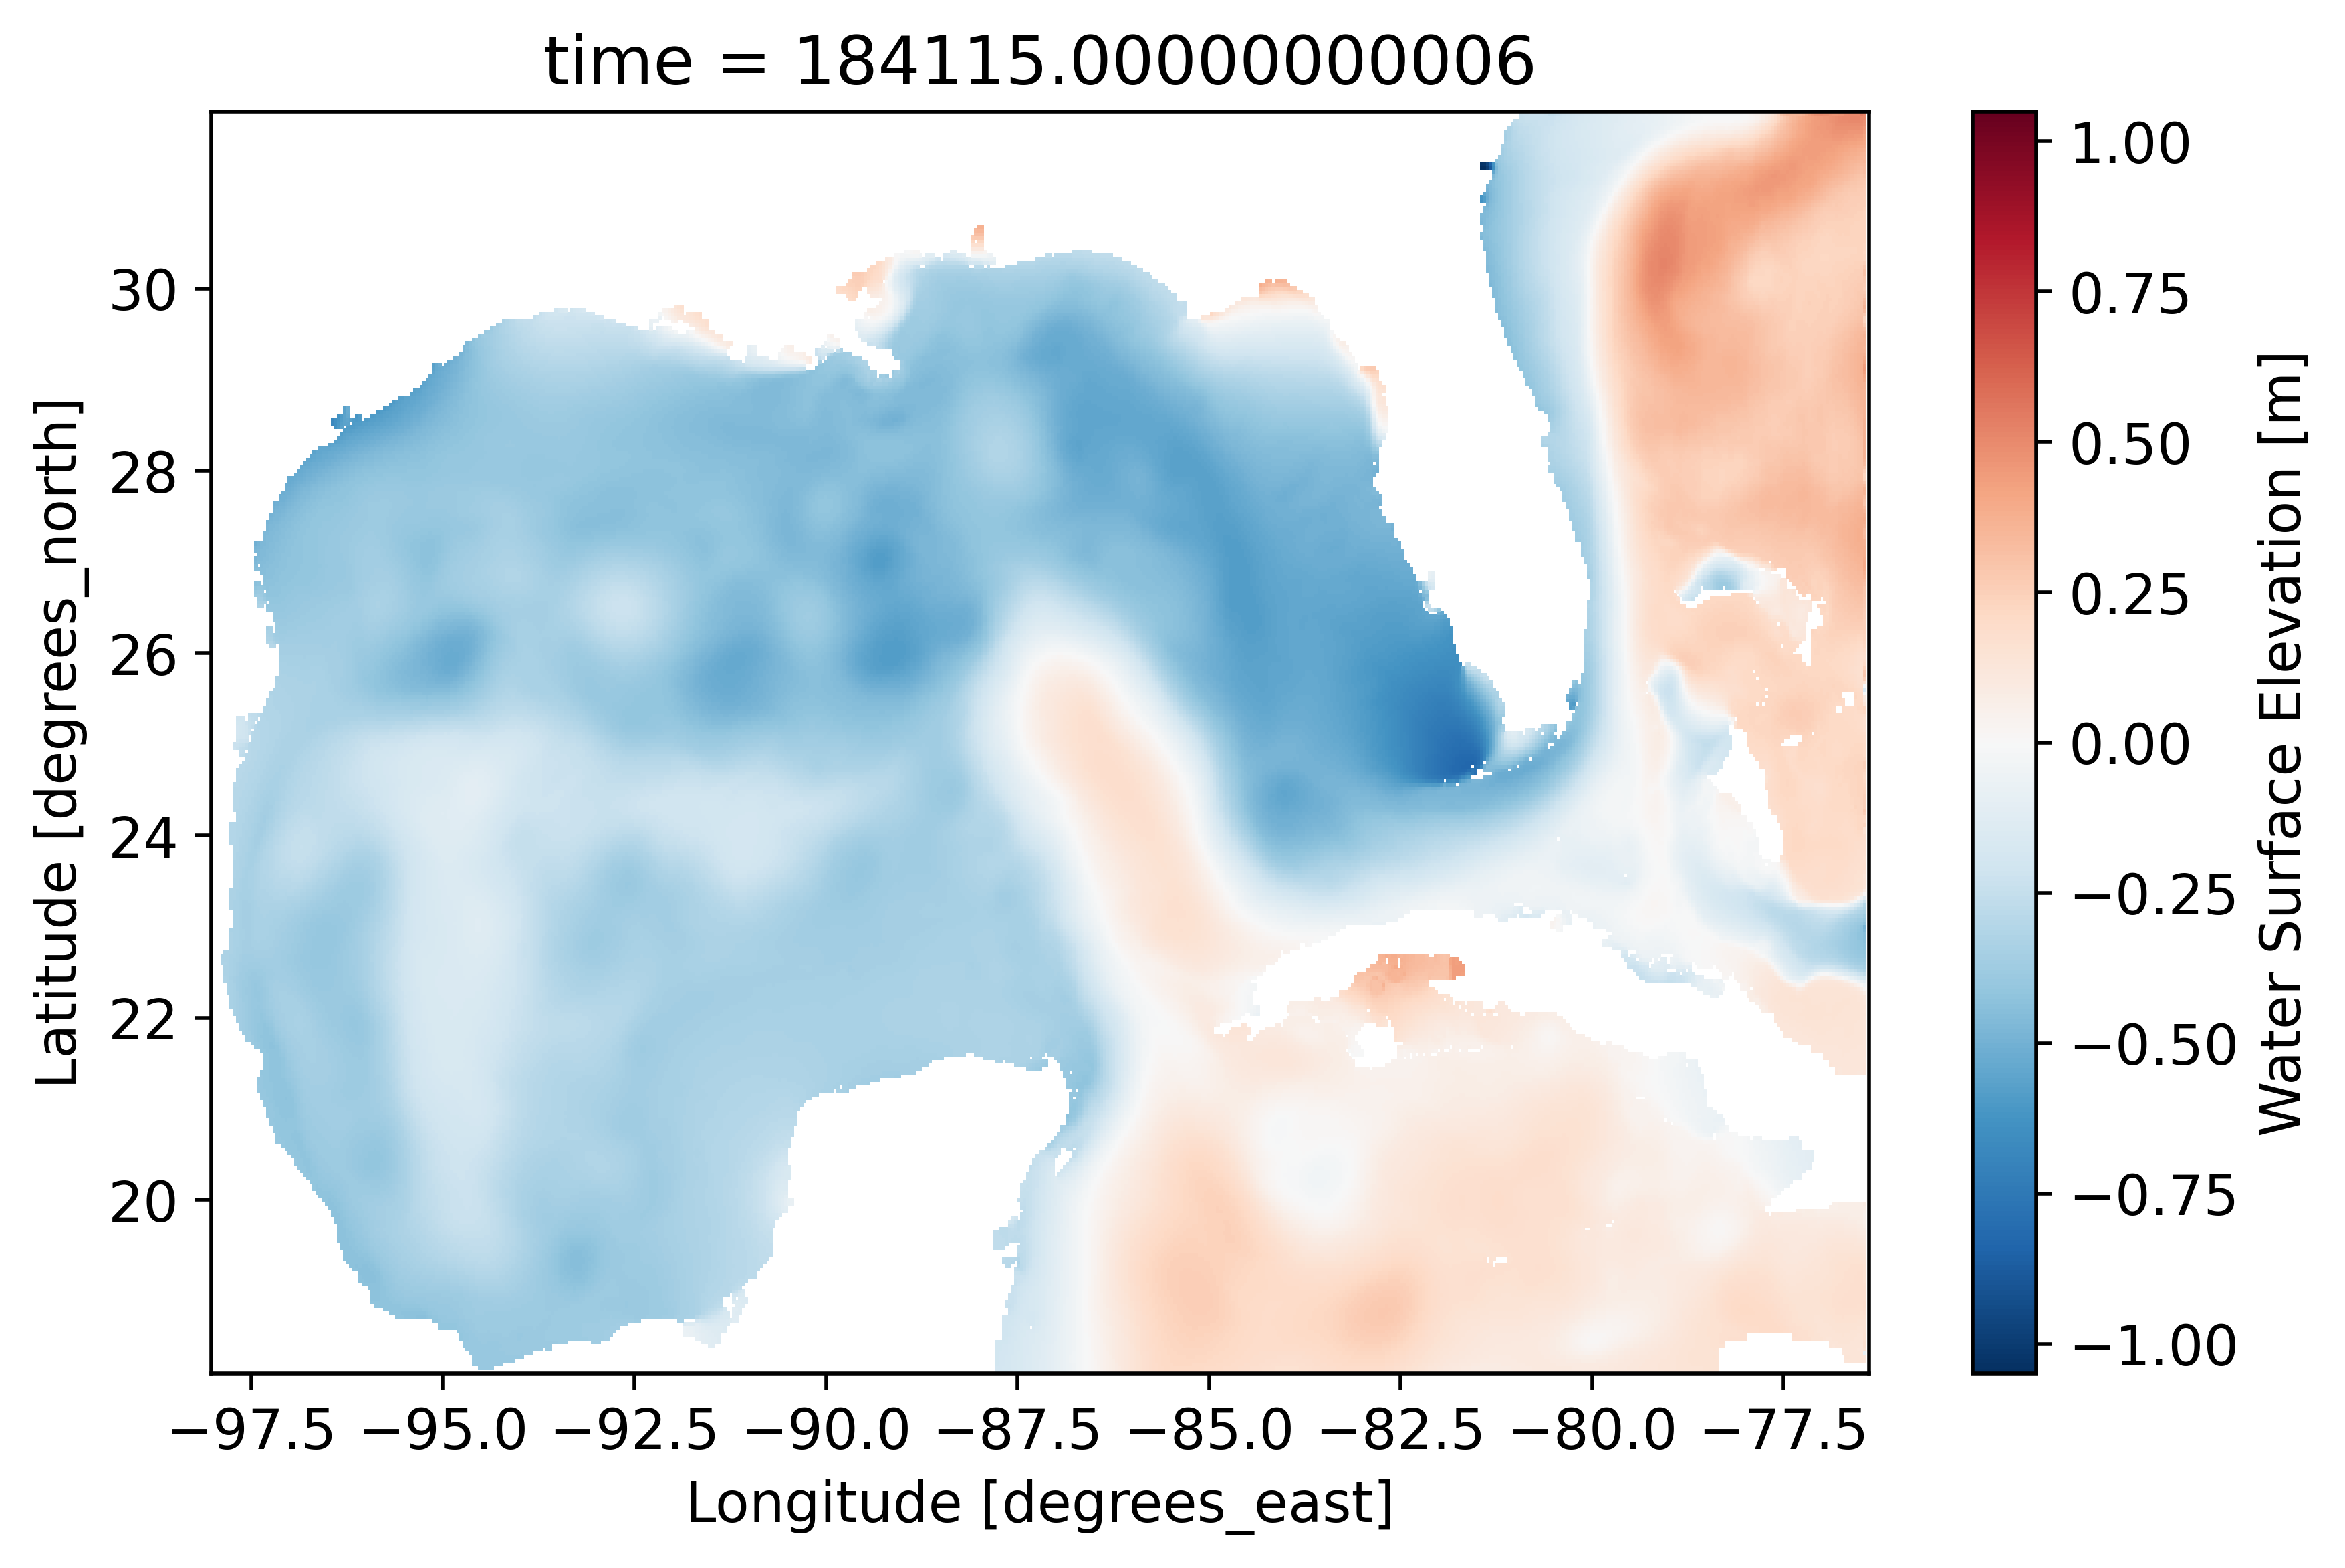

In [39]:
SSH_0.plot()

I can also save this subset of the data to a new netcdf file locally very easily. See http://xarray.pydata.org/en/stable/io.html for more details.

In [40]:
SSH_0.to_netcdf('SSH_0.nc') # the new netcdf file is saved in the local directory

I could also save more of the dataset if I wanted, for example the whole surface elevation timeseries. 

In [41]:
hycom_data.surf_el.to_netcdf('SSH_all.nc') # this is going to take a bit longer, more data

And then I load in the new netcdf file in the same way as I did the remote data, but using the local filepath

In [42]:
ssh_data = xr.open_dataset('SSH_all.nc', decode_times=False)

In [43]:
ssh_data

<xarray.Dataset>
Dimensions:  (lat: 346, lon: 541, time: 1)
Coordinates:
  * time     (time) float64 1.841e+05
  * lat      (lat) float64 18.12 18.16 18.2 18.24 ... 31.8 31.84 31.88 31.92
  * lon      (lon) float64 -98.0 -97.96 -97.92 -97.88 ... -76.48 -76.44 -76.4
Data variables:
    surf_el  (time, lat, lon) float32 ...

In [44]:
whos

Variable     Type         Data/Info
-----------------------------------
SSH_0        DataArray    <xarray.DataArray 'surf_e<...>m\n    NAVO_code:      32
a            ndarray      30: 30 elems, type `int32`, 120 bytes
hycom_data   Dataset      <xarray.Dataset>\nDimensi<...>        -76.4000244140625
link         str          E:/2020.nc4
mpl          module       <module 'matplotlib' from<...>matplotlib\\__init__.py'>
np           module       <module 'numpy' from 'C:\<...>ges\\numpy\\__init__.py'>
plt          module       <module 'matplotlib.pyplo<...>\\matplotlib\\pyplot.py'>
ssh_data     Dataset      <xarray.Dataset>\nDimensi<...>me, lat, lon) float32 ...
x            ndarray      10: 10 elems, type `int32`, 40 bytes
xr           module       <module 'xarray' from 'C:<...>es\\xarray\\__init__.py'>
y            ndarray      5: 5 elems, type `int32`, 20 bytes


# Lab 7.2

**E.0** Finish Lab 7.1 if you haven't already.

**E.1** Complete Introduction to Data Visualization with Matplotlib Chapters 3-4

In [45]:
#Done 

**E.2** Make notes for yourself on progamming tecniques and commands you learned in the lecture and datacamp chapter above, including examples, comments and explainitory text. You can do this here or in a separate notebook that you link to here. Basically, you are making a cheat sheet for yourself.

See also http://xarray.pydata.org/en/stable/plotting.html for more info about plotting right from xarray (optional).

In [46]:
#the different kinds of data plotting and visualization in accordance with data type.
#ax.hist(data_name['Column']) - histogram


In [47]:
#for scatter plot, ax.scatter(data_name[column1],data_name[column 2] )
    #add coolor and label by one , comma and color = "the color you want" and similar as for label of data

In [48]:
#https://matplotlib.org/gallery/style_sheets/style_sheets_reference - check the library
#do not forget the key statement to import data
 # file name = xr.open_dataset('file location/link', decode_times = false)   

In [49]:
 #for subplots
#fig, ax = plt.subplots()
#ax.plot(filename.index, filename['data'])

**E.3** Using the lecture as a guide, save the sea surface temperature for the last time in the dataset as a new, local netcdf file. You don't have to submit the file, just the code here.

In [50]:
#instead of sea surface temperature, i have downloaded 2019 water temperature data
link1 = "E:/2019.nc4"

In [51]:
water_temp1 = xr.open_dataset(link1, decode_times=False)

In [52]:
water_temp1

<xarray.Dataset>
Dimensions:     (depth: 1, lat: 346, lon: 541, time: 1)
Coordinates:
  * time        (time) float64 1.753e+05
  * depth       (depth) float64 0.0
  * lat         (lat) float64 18.12 18.16 18.2 18.24 ... 31.8 31.84 31.88 31.92
  * lon         (lon) float64 -98.0 -97.96 -97.92 -97.88 ... -76.48 -76.44 -76.4
Data variables:
    water_temp  (time, depth, lat, lon) float32 ...
Attributes: (12/14)
    classification_level:      UNCLASSIFIED
    distribution_statement:    Approved for public release. Distribution unli...
    downgrade_date:            not applicable
    classification_authority:  not applicable
    institution:               Naval Oceanographic Office
    source:                    HYCOM archive file
    ...                        ...
    Conventions:               CF-1.6 NAVO_netcdf_v1.1
    History:                   Translated to CF-1.0 Conventions by Netcdf-Jav...
    geospatial_lat_min:        18.1200008392334
    geospatial_lat_max:        31.920000076293945
    geospatial_lon_min:        -98.0
    geospatial_lon_max:        -76.4000244140625

In [53]:
water_temp1.lat.min()

<xarray.DataArray 'lat' ()>
array(18.12000084)

In [54]:
water_temp1.lon.min()

<xarray.DataArray 'lon' ()>
array(-98.)

In [55]:
water_temp1.water_temp.to_netcdf('watertempreal.nc')

**E.4** Plot the above (the last SST in the file).

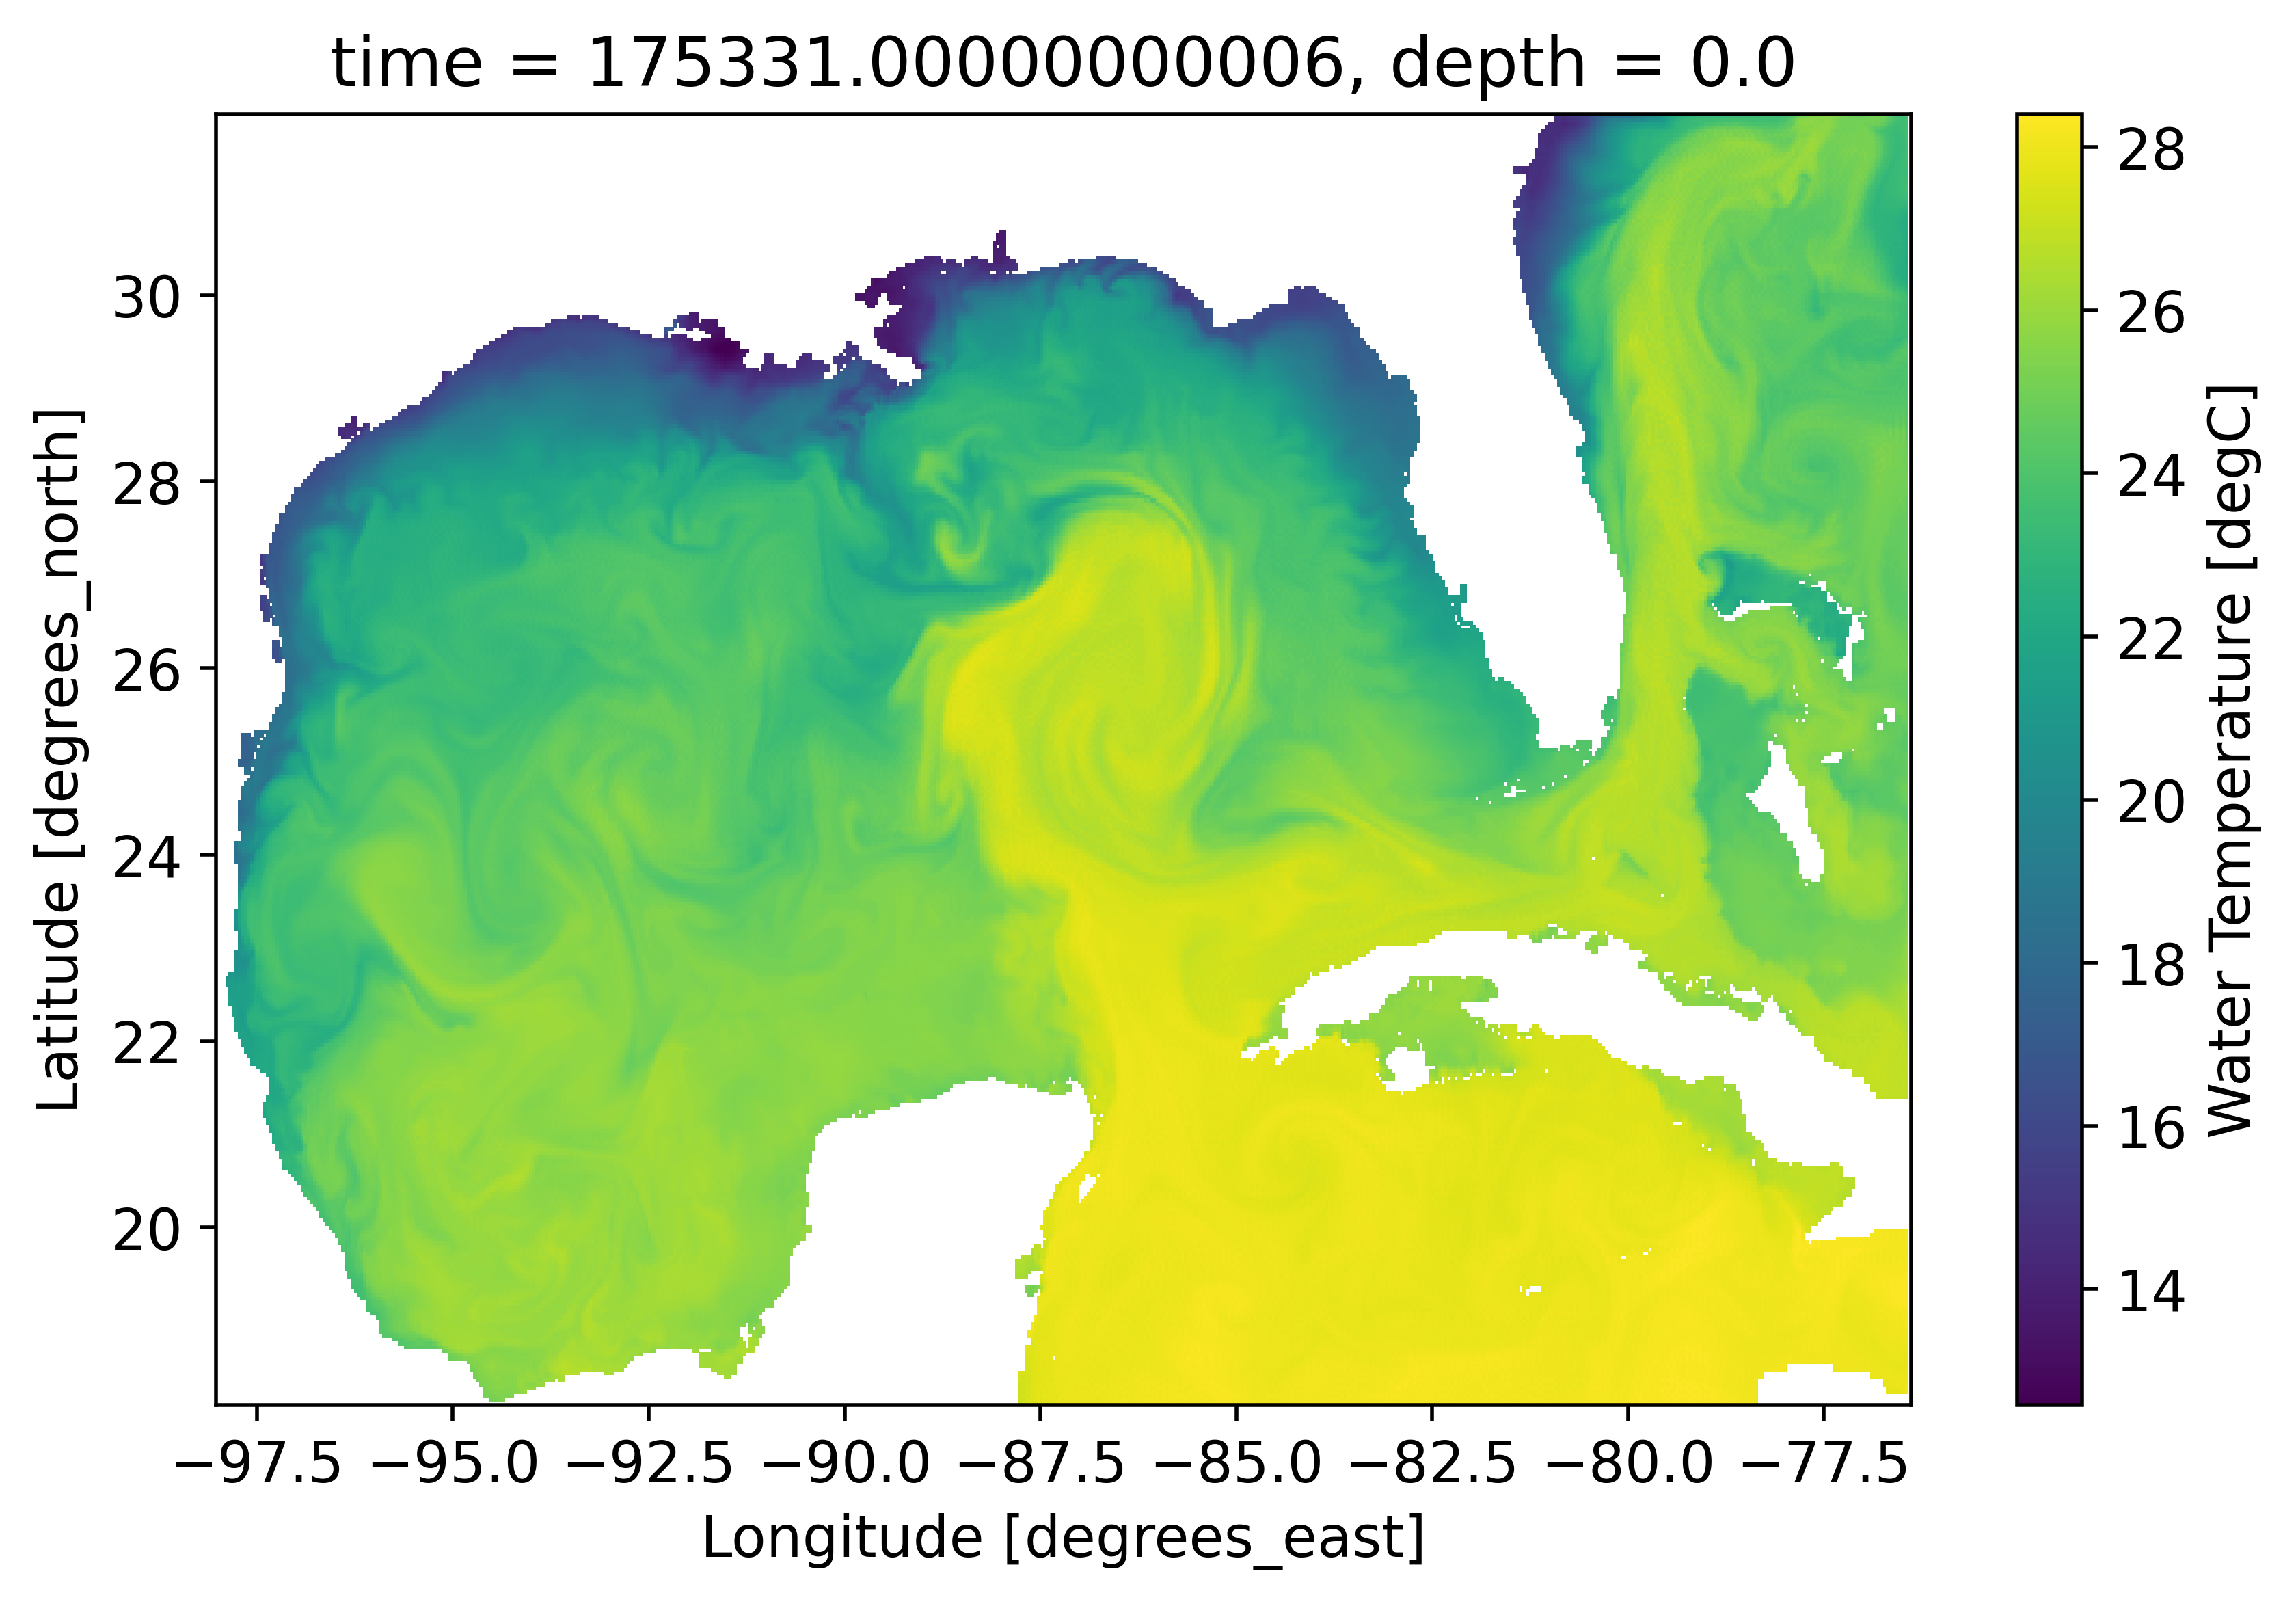

In [56]:
water_temp1.water_temp[-1,0,:,:].plot()

### This week's project:

For Monday's class you will write two functions that work on your dataset (you can use the same dataset or a different one). The first function will do some sort of analysis, manipulation or calculation, the second will be a plotting function. The idea here is that if you had another datafile that was similar, you could use the function to do the operation again easily.

**E.5** Write one or more functions that plot your dataset. You will present these to the class on Monday.

In [57]:
import pandas as pd

In [58]:
data = pd.read_csv(r'E:\2019e.csv')

In [59]:
data

,PARAMETER,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANN
0,PPT,1.21,0.54,1.85,0.52,1.50,4.29,1.24,0.41,3.74,2.57,1.28,0.80,1.66
1,TEMP_MAX,20.78,22.28,23.14,26.78,29.94,31.73,31.47,32.52,31.30,29.39,24.09,22.57,27.19
2,TEMP_MIN,15.07,16.42,17.88,20.43,25.32,27.21,27.26,28.27,27.67,23.54,18.33,16.53,22.03
3,WS_MIN,3.10,2.94,4.04,3.71,4.56,4.05,4.23,4.18,3.54,3.45,2.96,2.99,3.65
4,WS_MAX,7.82,7.27,8.09,8.04,8.02,6.89,6.87,6.77,6.81,7.91,7.46,7.25,7.43


In [60]:
pd.read_csv(r'E:\2019e.csv', header=None).T.to_csv('transpose2019.csv', header=False, index=False)

In [61]:
pd.read_csv(r'transpose2019.csv')
data_trans = pd.read_csv(r'transpose2019.csv')


In [62]:
data_trans

,PARAMETER,PPT,TEMP_MAX,TEMP_MIN,WS_MIN,WS_MAX
0,JAN,1.21,20.78,15.07,3.10,7.82
1,FEB,0.54,22.28,16.42,2.94,7.27
2,MAR,1.85,23.14,17.88,4.04,8.09
3,APR,0.52,26.78,20.43,3.71,8.04
4,MAY,1.50,29.94,25.32,4.56,8.02
5,JUN,4.29,31.73,27.21,4.05,6.89
6,JUL,1.24,31.47,27.26,4.23,6.87
7,AUG,0.41,32.52,28.27,4.18,6.77
8,SEP,3.74,31.30,27.67,3.54,6.81
9,OCT,2.57,29.39,23.54,3.45,7.91


In [63]:
def graphFunction(yvalue, title, ylabel):
    data_trans.plot.line( x = 'PARAMETER', y = yvalue)
    plt.title(title)
    plt.ylabel(ylabel)

<AxesSubplot:xlabel='PARAMETER'>

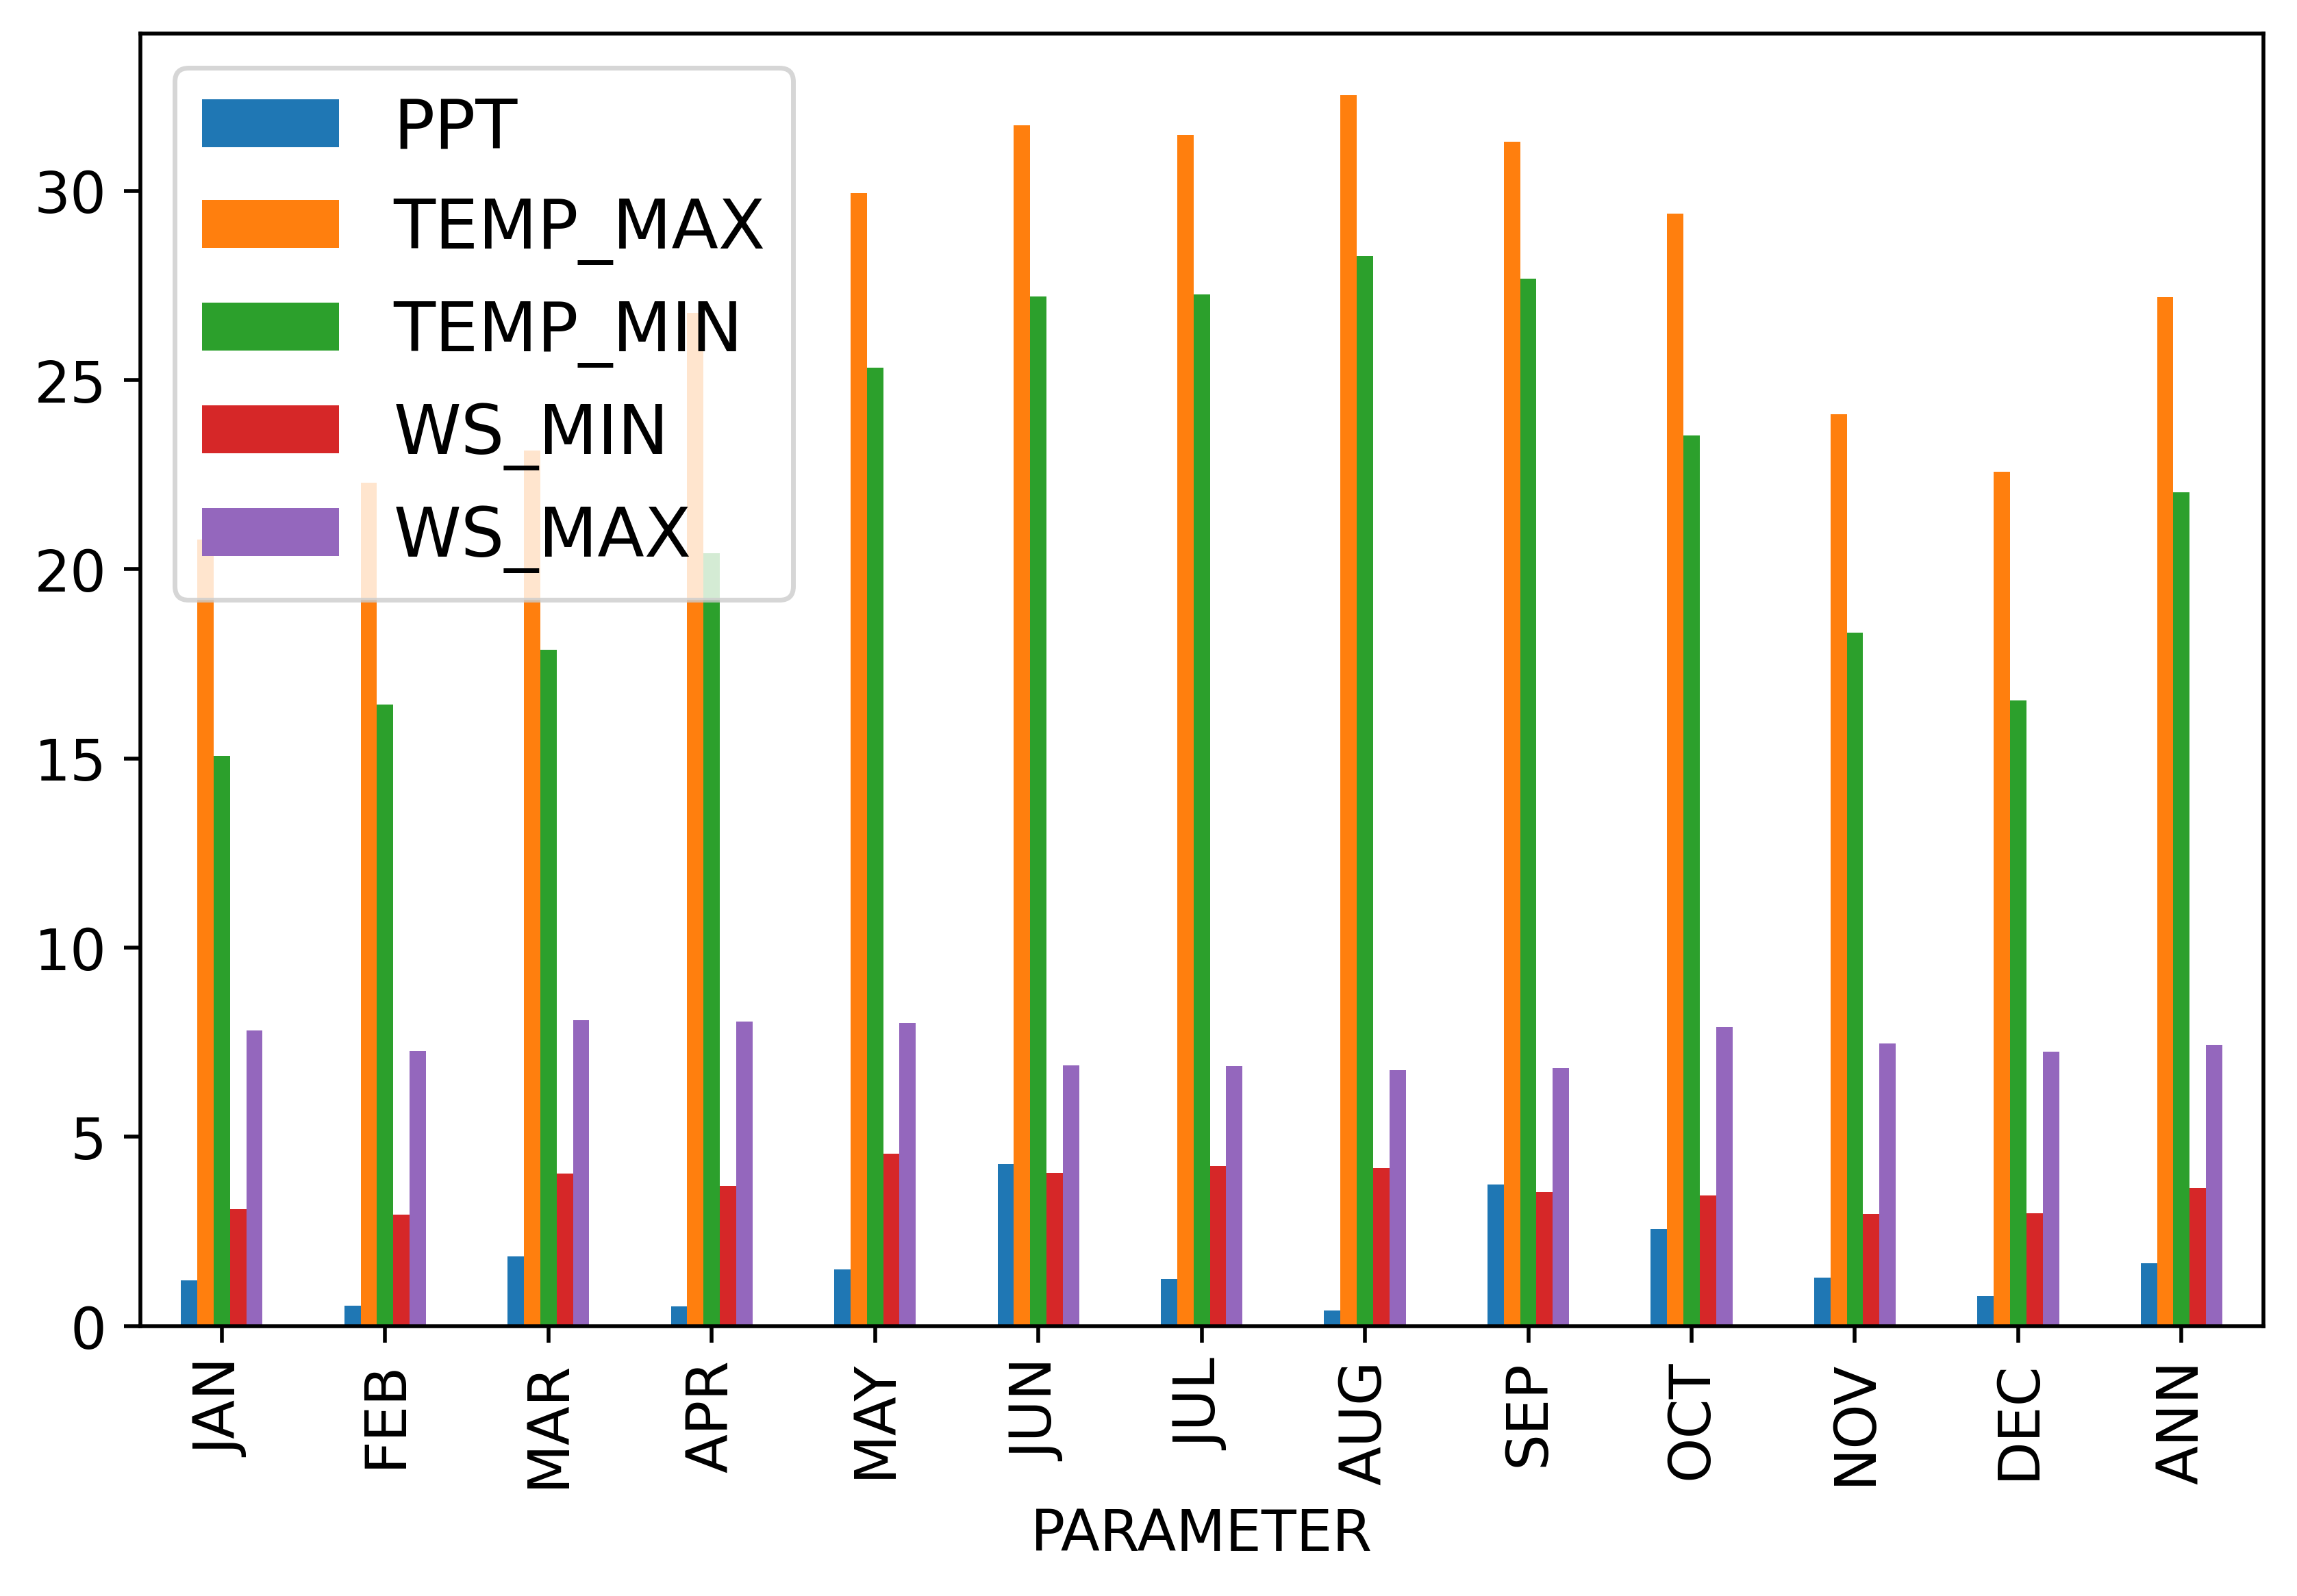

In [64]:
data_trans.plot.bar(x = 'PARAMETER', y = ['PPT', 'TEMP_MAX', 'TEMP_MIN', 'WS_MIN', 'WS_MAX'])	

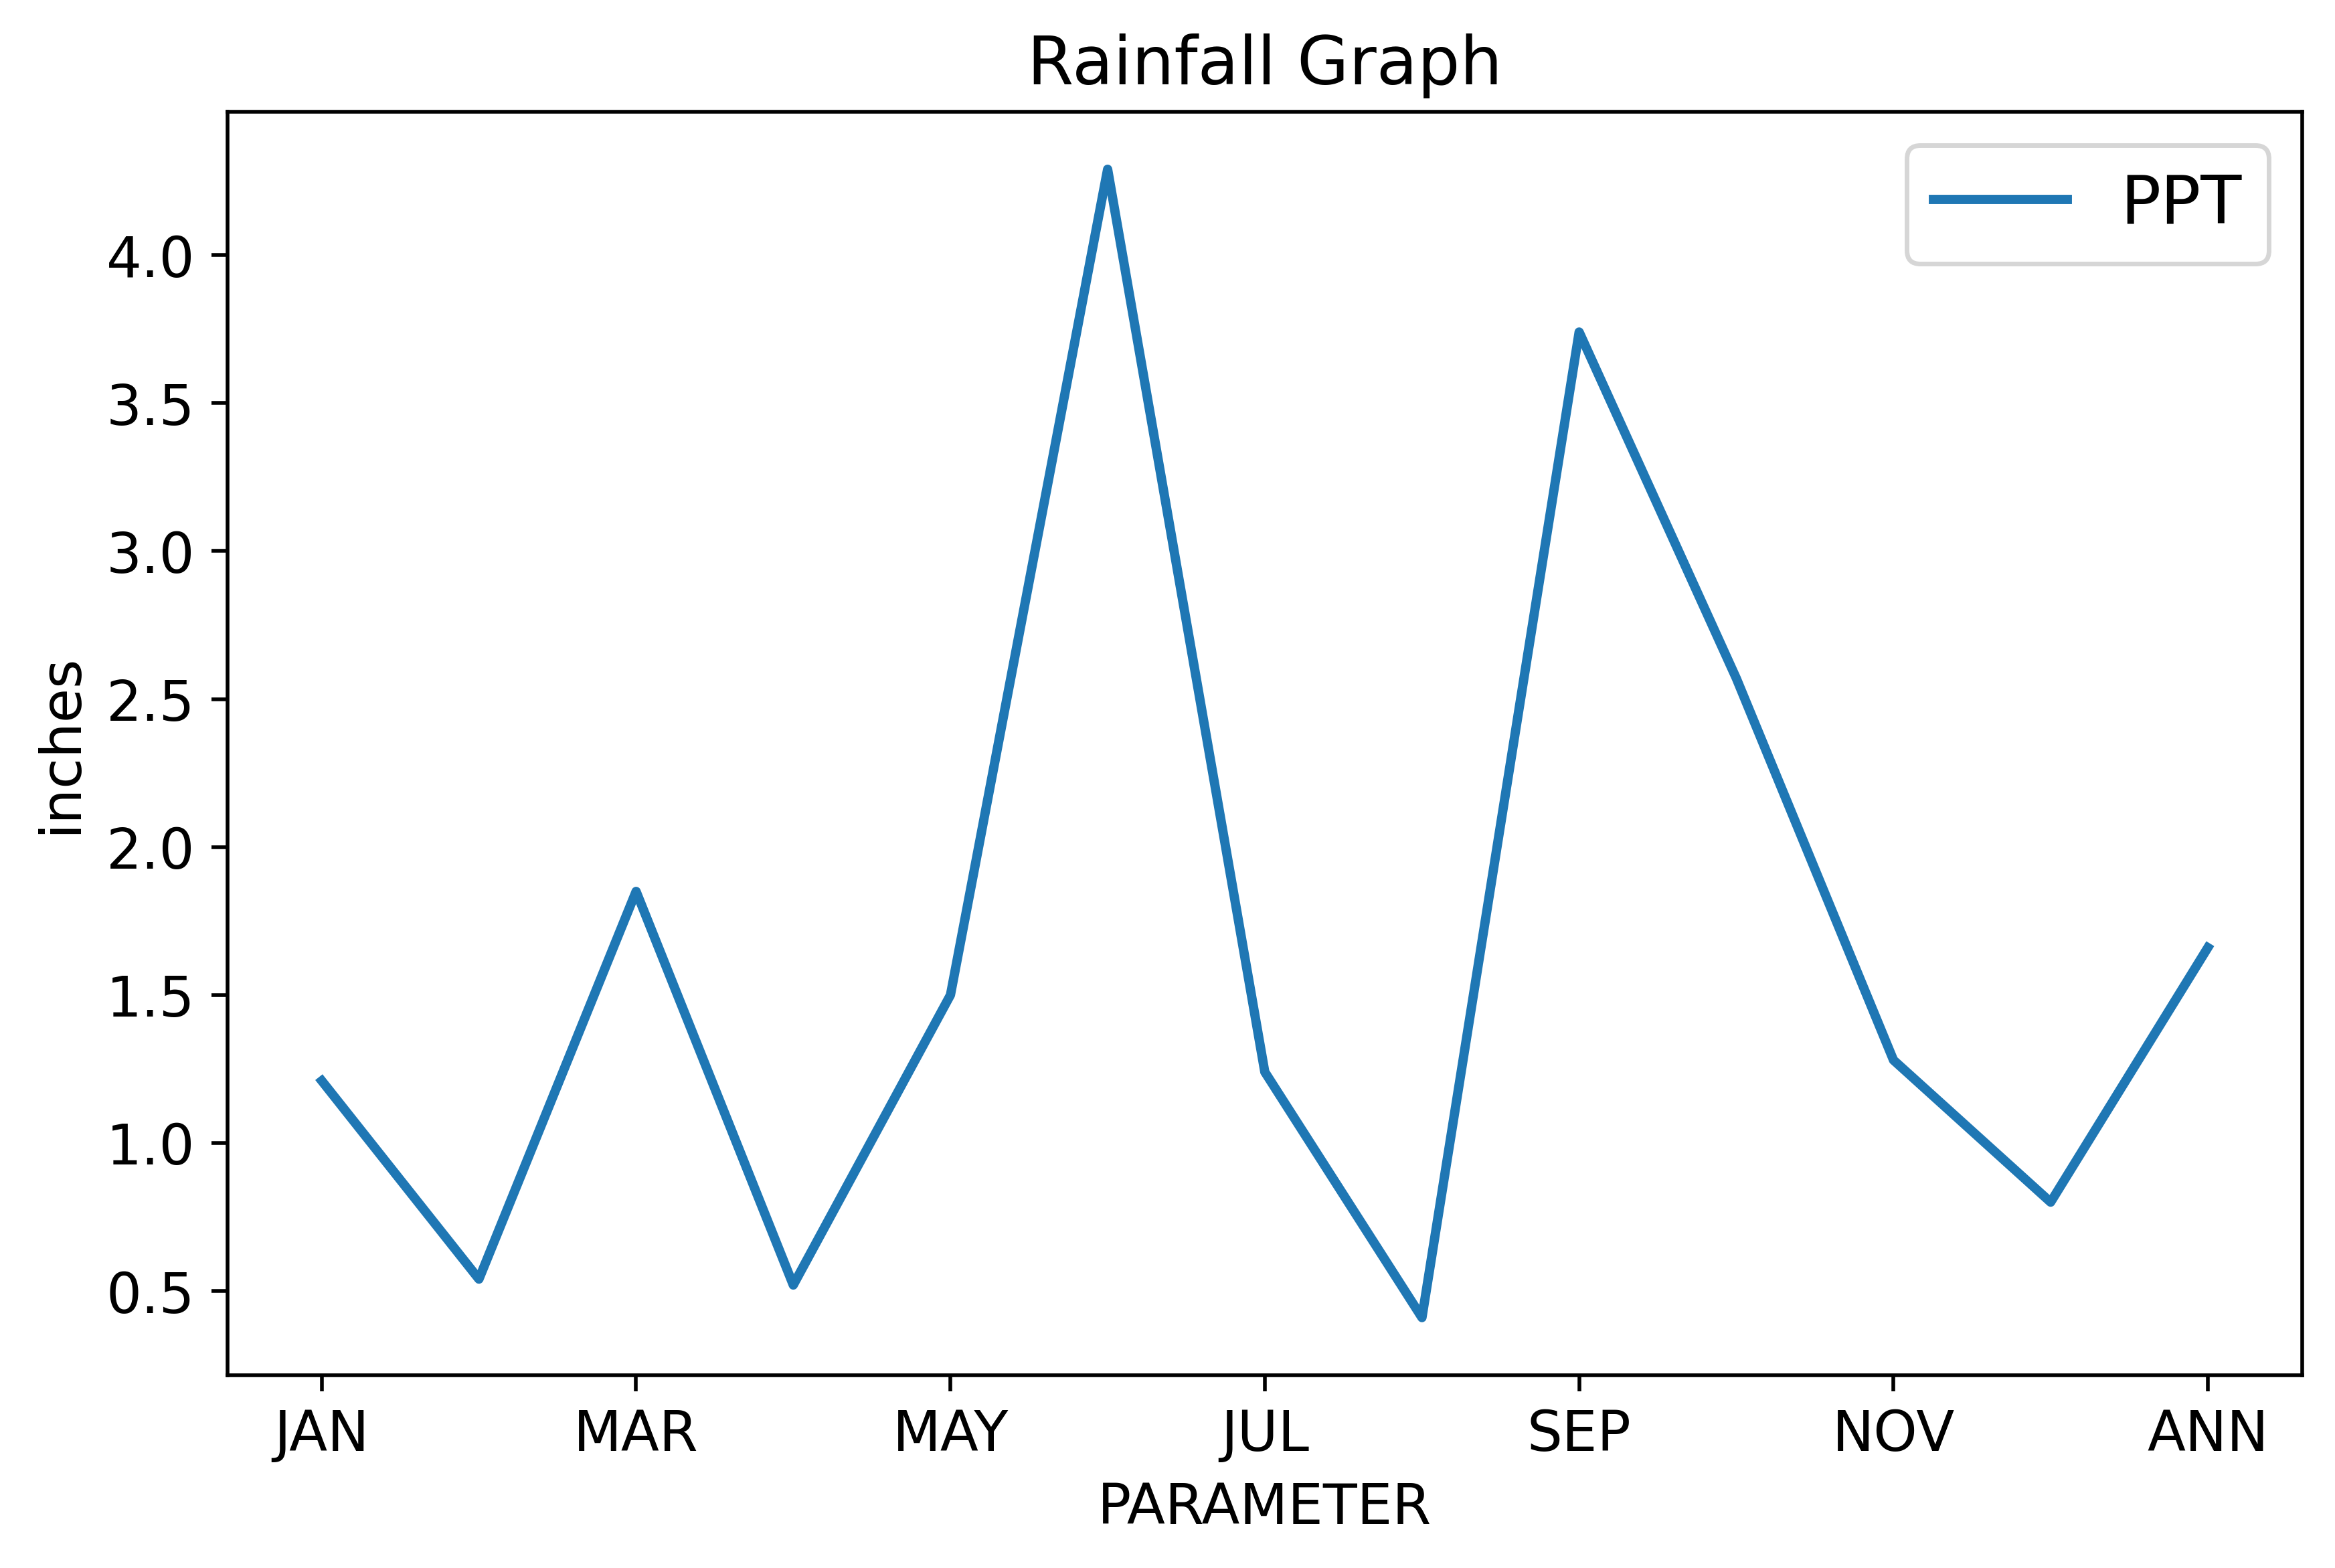

In [65]:
graphFunction(['PPT'], 'Rainfall Graph', 'inches')
#PPT = Precipitation

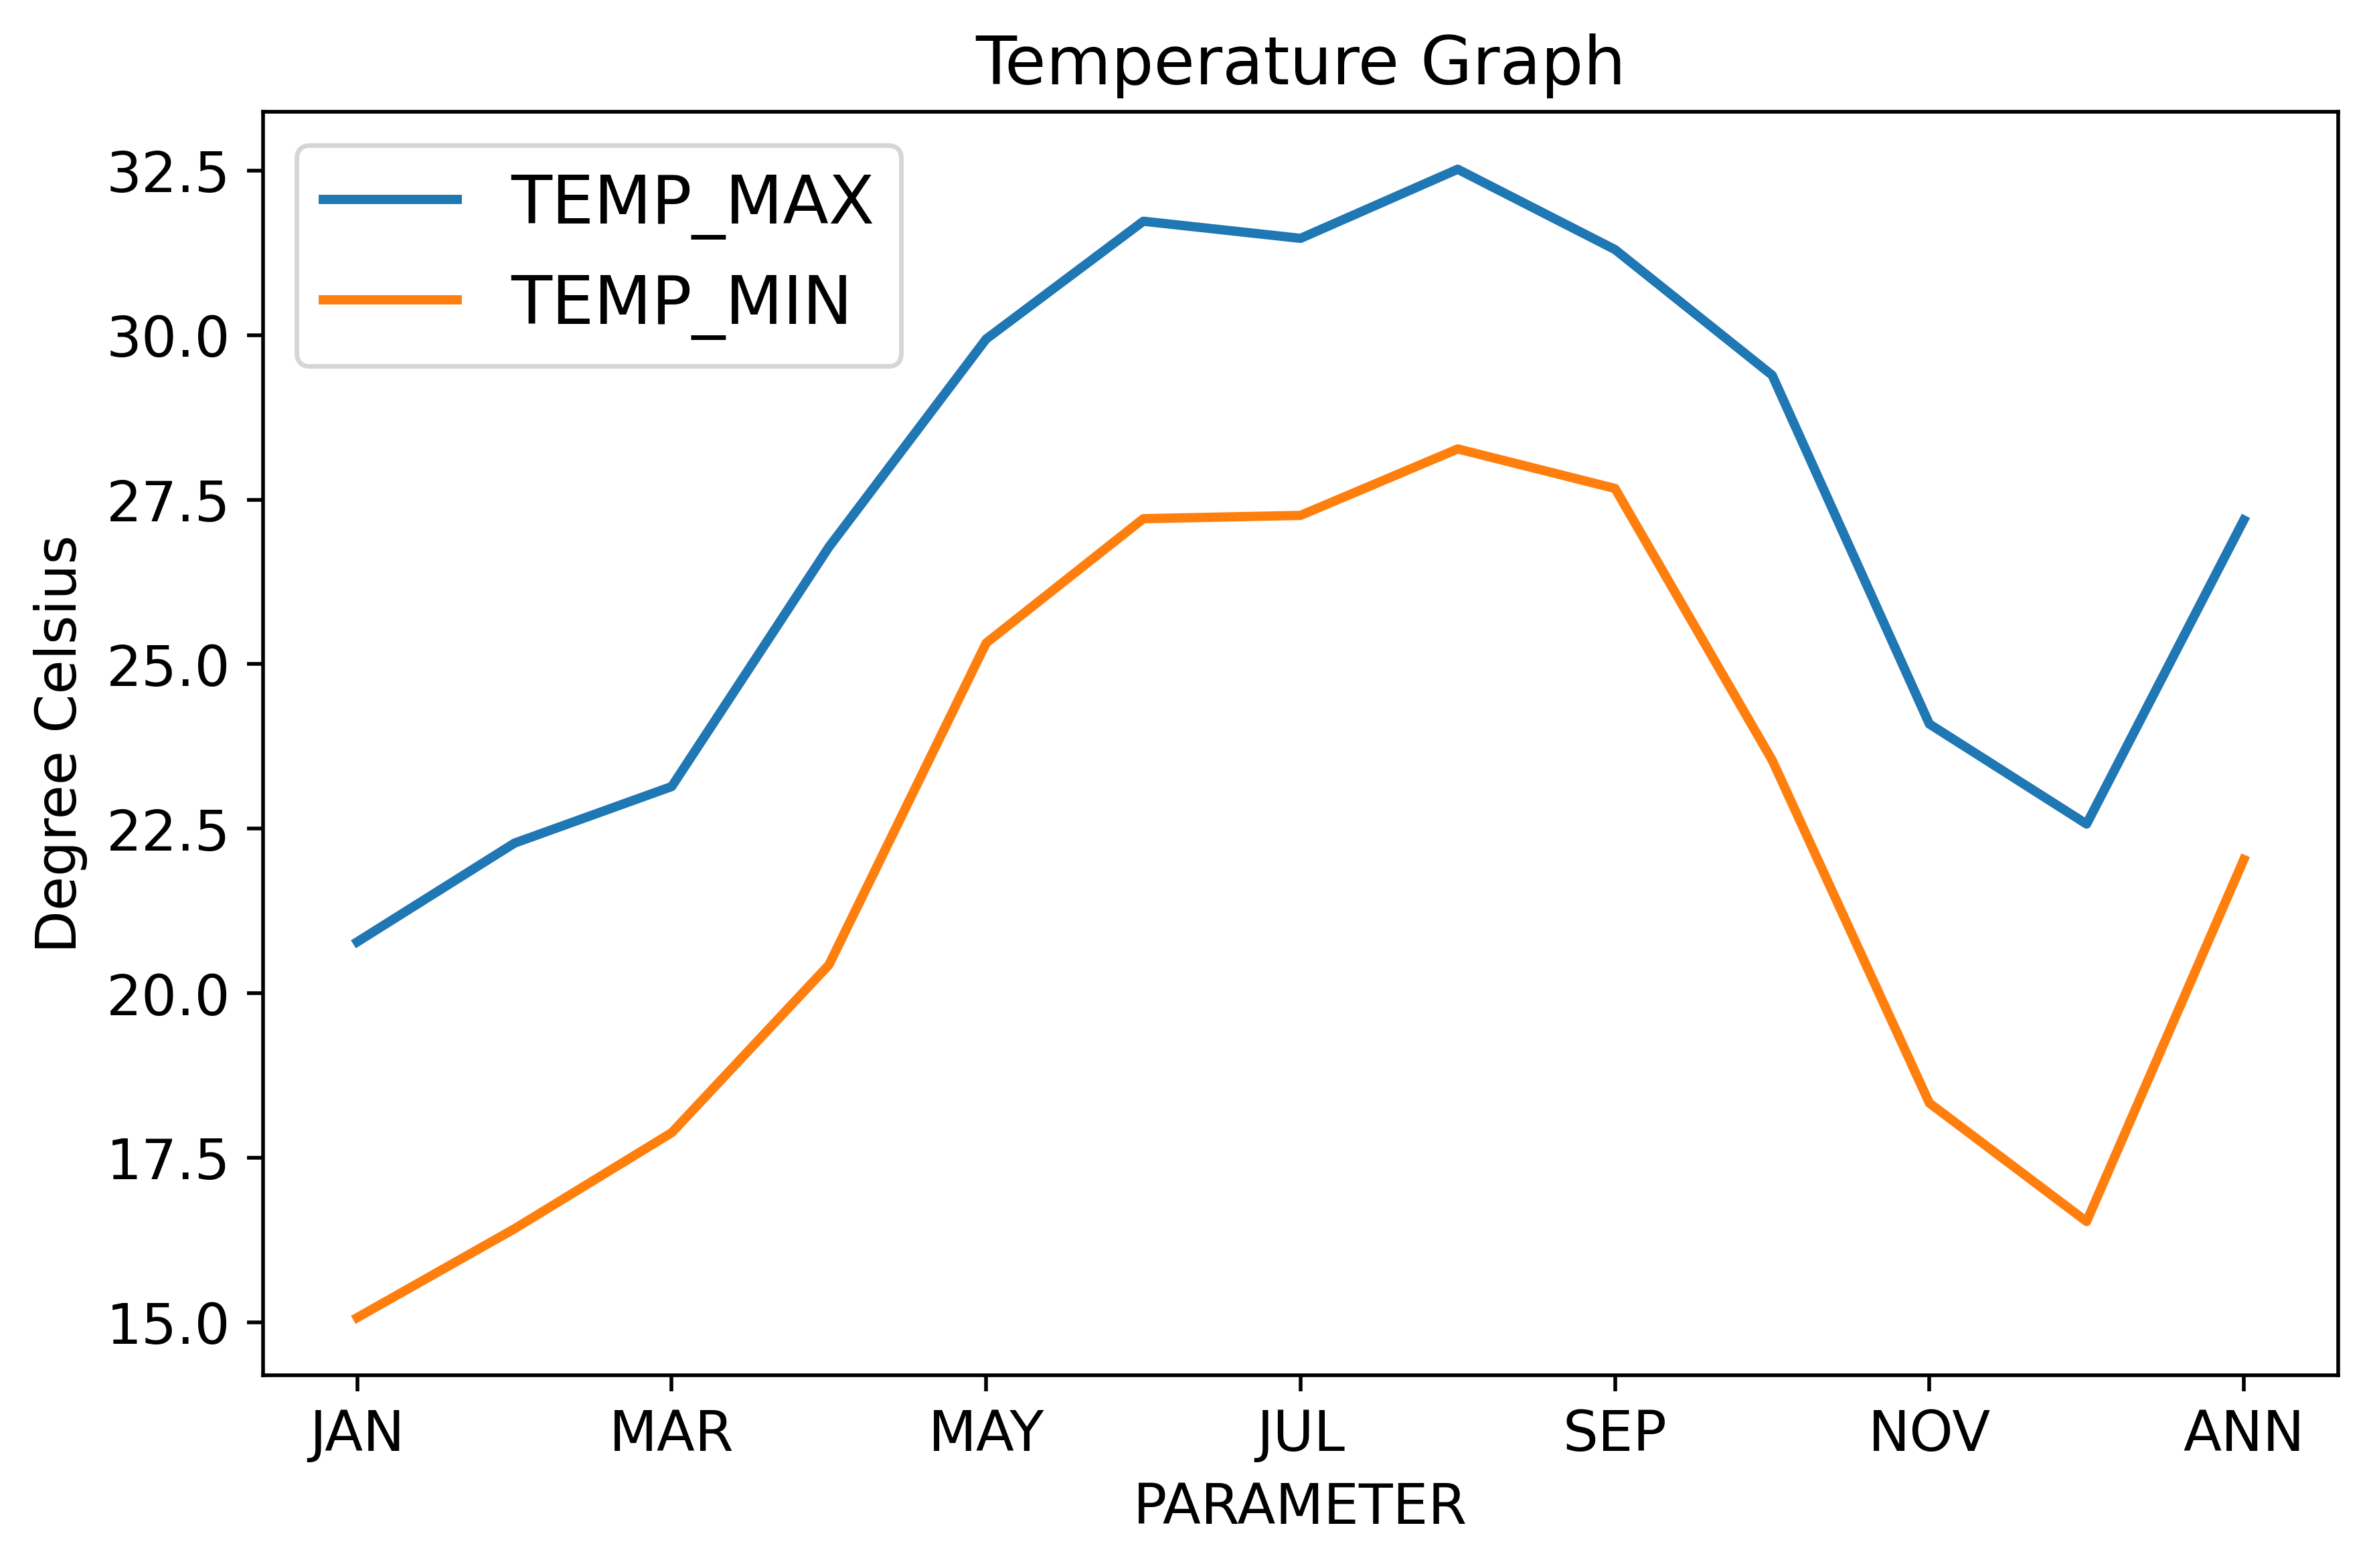

In [66]:
graphFunction([ 'TEMP_MAX', 'TEMP_MIN'], 'Temperature Graph', 'Degree Celsius')

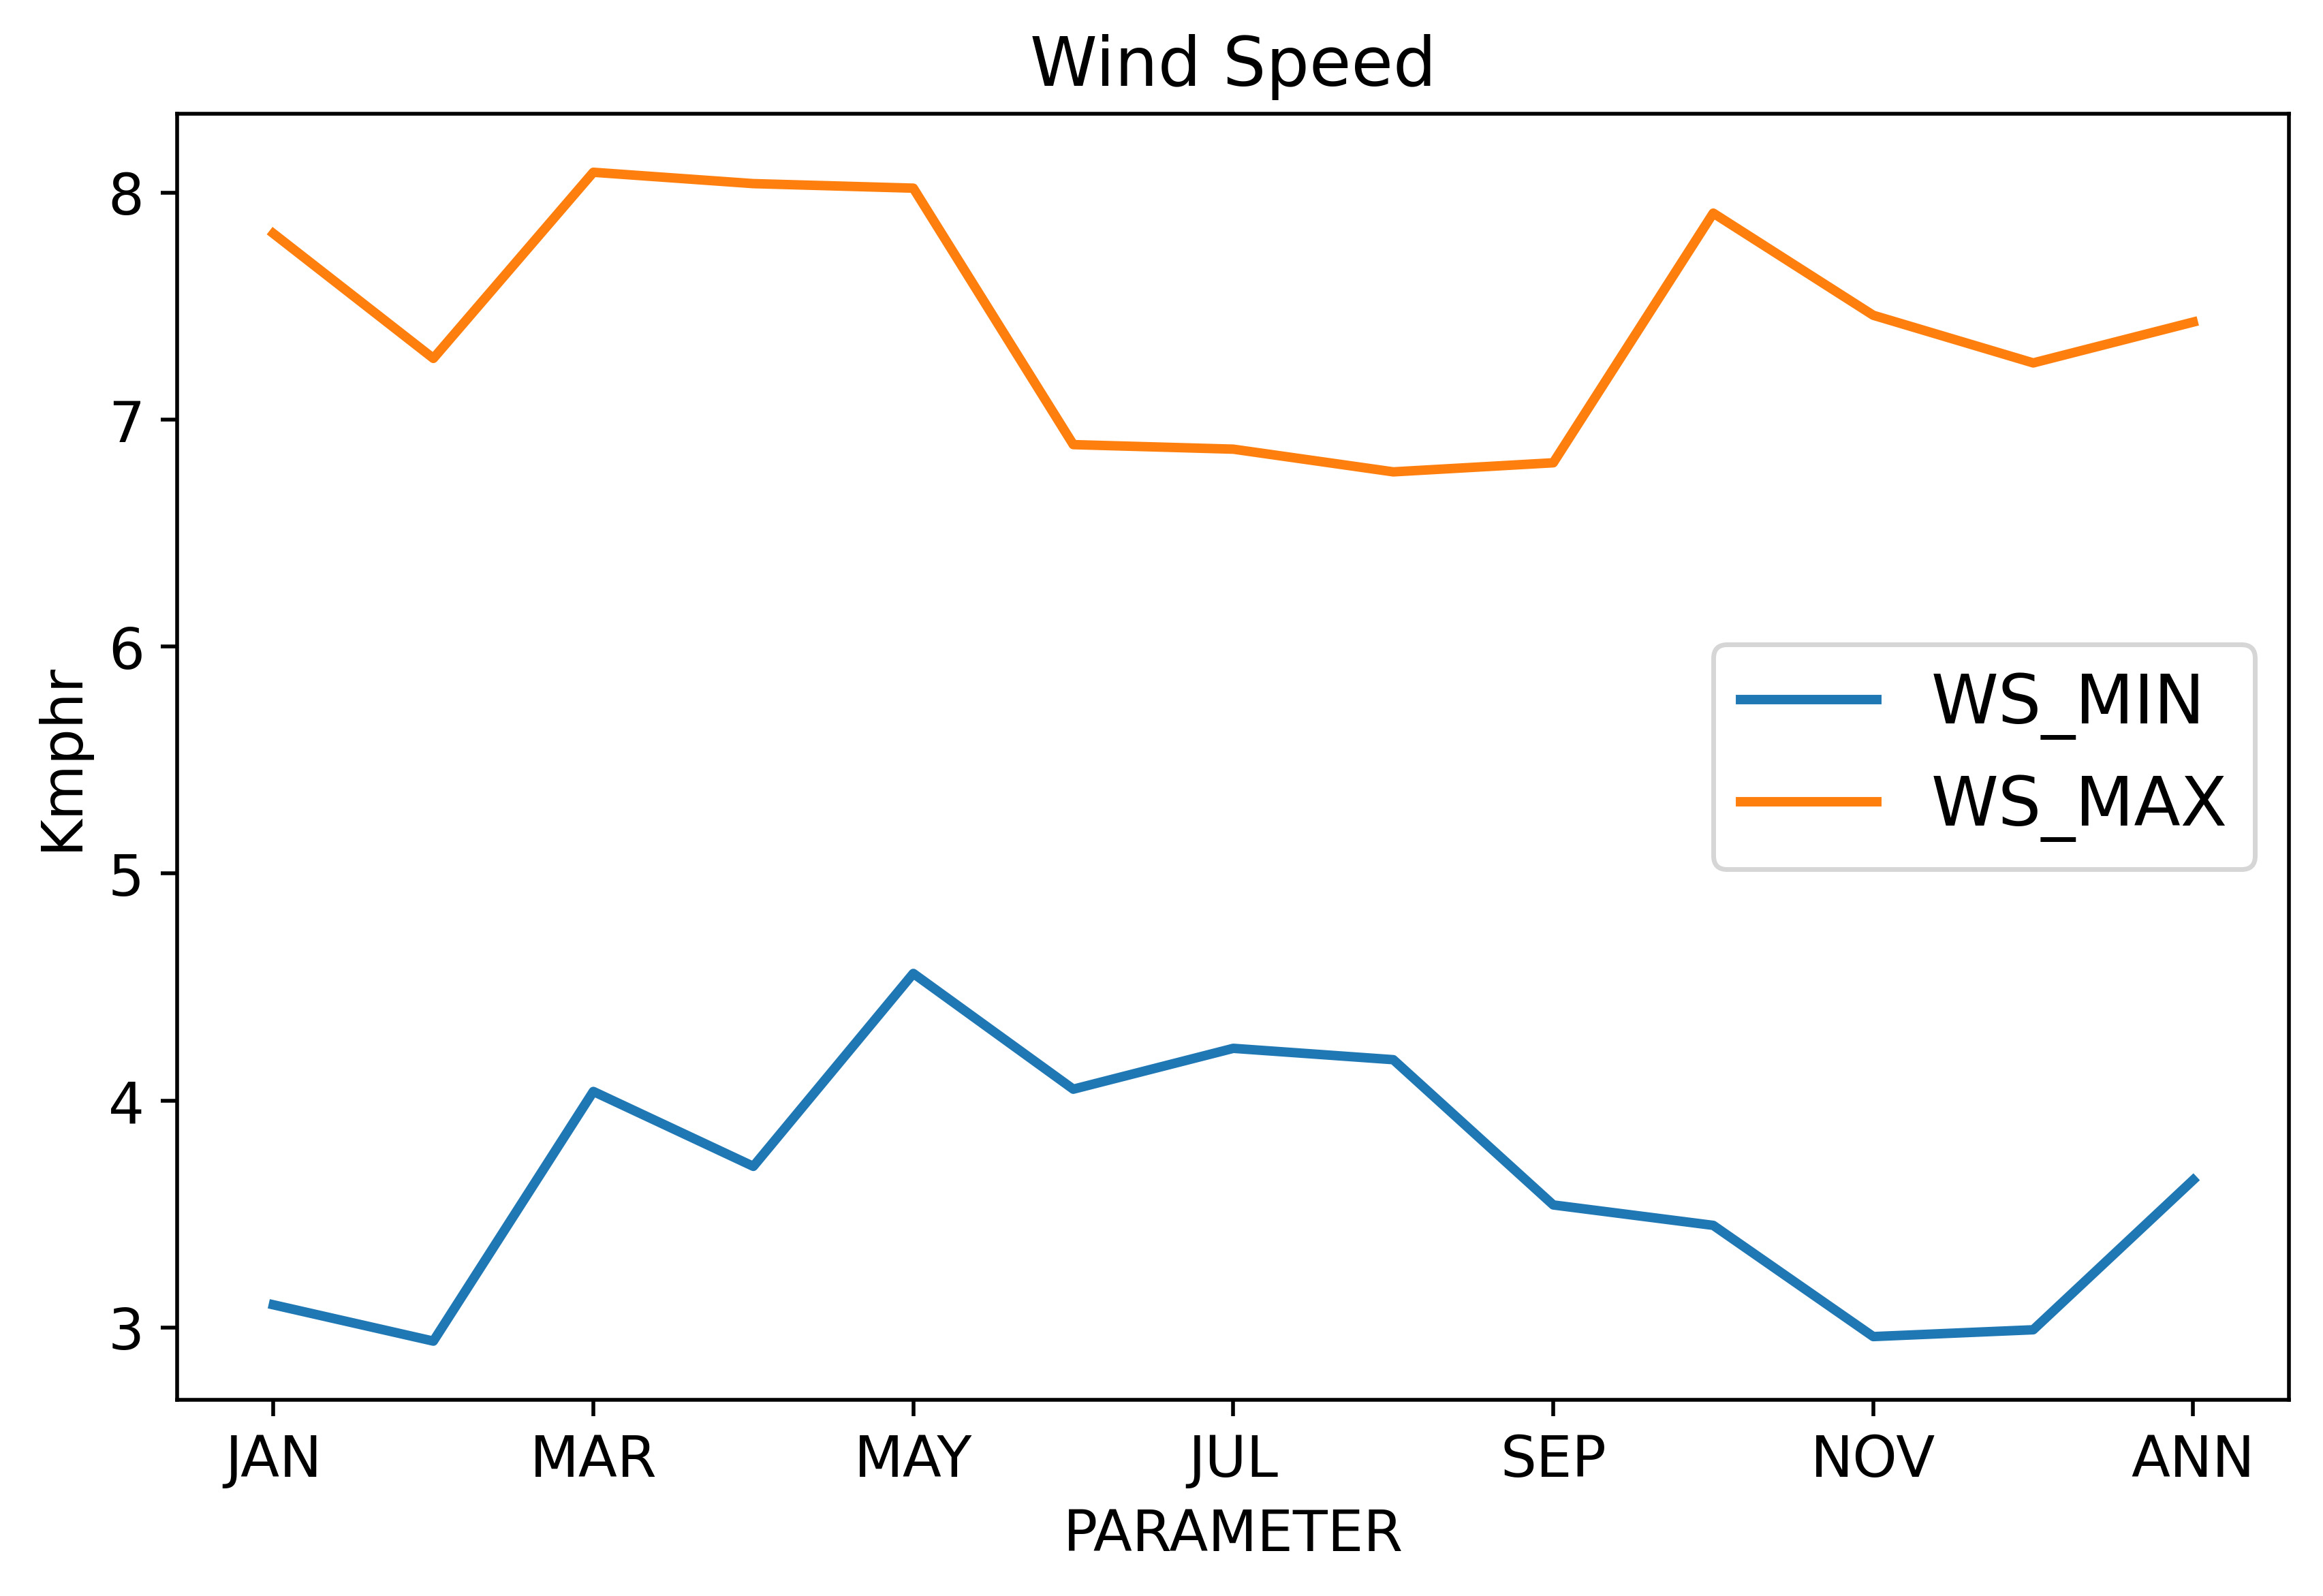

In [67]:
graphFunction([ 'WS_MIN', 'WS_MAX'], 'Wind Speed', 'Kmphr')

In [68]:
#The mean of the Minimum
WindMin = data_trans['WS_MIN'].mean()


In [69]:
WindMin

3.6461538461538465

In [70]:
#The mean of the Maximum Wind SPeead 
WindMax = data_trans['WS_MAX'].mean()

In [71]:
WindMax

7.433076923076923

In [72]:
#The maximum temperature
data_trans['TEMP_MAX'].max()

32.52

In [73]:
#The mimimum temperature
data_trans['TEMP_MAX'].min()

20.78

In [74]:
#The highest precipitation is
data_trans['PPT'].max()

4.29

In [75]:
#The average rainfall is
data_trans['PPT'].mean()

1.6623076923076925

In [76]:
#we can get the table of statistical value of our data

In [77]:
data_trans.describe()

,PPT,TEMP_MAX,TEMP_MIN,WS_MIN,WS_MAX
count,13.000000,13.000000,13.000000,13.000000,13.000000
mean,1.662308,27.167692,21.996923,3.646154,7.433077
std,1.208044,4.176803,4.844745,0.542472,0.501853
min,0.410000,20.780000,15.070000,2.940000,6.770000
25%,0.800000,23.140000,17.880000,3.100000,6.890000
50%,1.280000,27.190000,22.030000,3.650000,7.430000
75%,1.850000,31.300000,27.210000,4.050000,7.910000
max,4.290000,32.520000,28.270000,4.560000,8.090000


In [78]:
#For correlation of data
#Showing our data
data_trans

,PARAMETER,PPT,TEMP_MAX,TEMP_MIN,WS_MIN,WS_MAX
0,JAN,1.21,20.78,15.07,3.10,7.82
1,FEB,0.54,22.28,16.42,2.94,7.27
2,MAR,1.85,23.14,17.88,4.04,8.09
3,APR,0.52,26.78,20.43,3.71,8.04
4,MAY,1.50,29.94,25.32,4.56,8.02
5,JUN,4.29,31.73,27.21,4.05,6.89
6,JUL,1.24,31.47,27.26,4.23,6.87
7,AUG,0.41,32.52,28.27,4.18,6.77
8,SEP,3.74,31.30,27.67,3.54,6.81
9,OCT,2.57,29.39,23.54,3.45,7.91


In [79]:
c1 = data_trans['PPT']

In [80]:
c2 = data_trans['TEMP_MAX']

In [81]:
test_corr = c1.corr(c2)

In [82]:
test_corr

0.4430182887677117

In [83]:
#Computing correlation between Maximum wind and Maximum Temperature
c3 = data_trans['WS_MAX']

In [84]:
corr_t_w = c3.corr(c2)

In [85]:
print(corr_t_w)

-0.48238670810612344


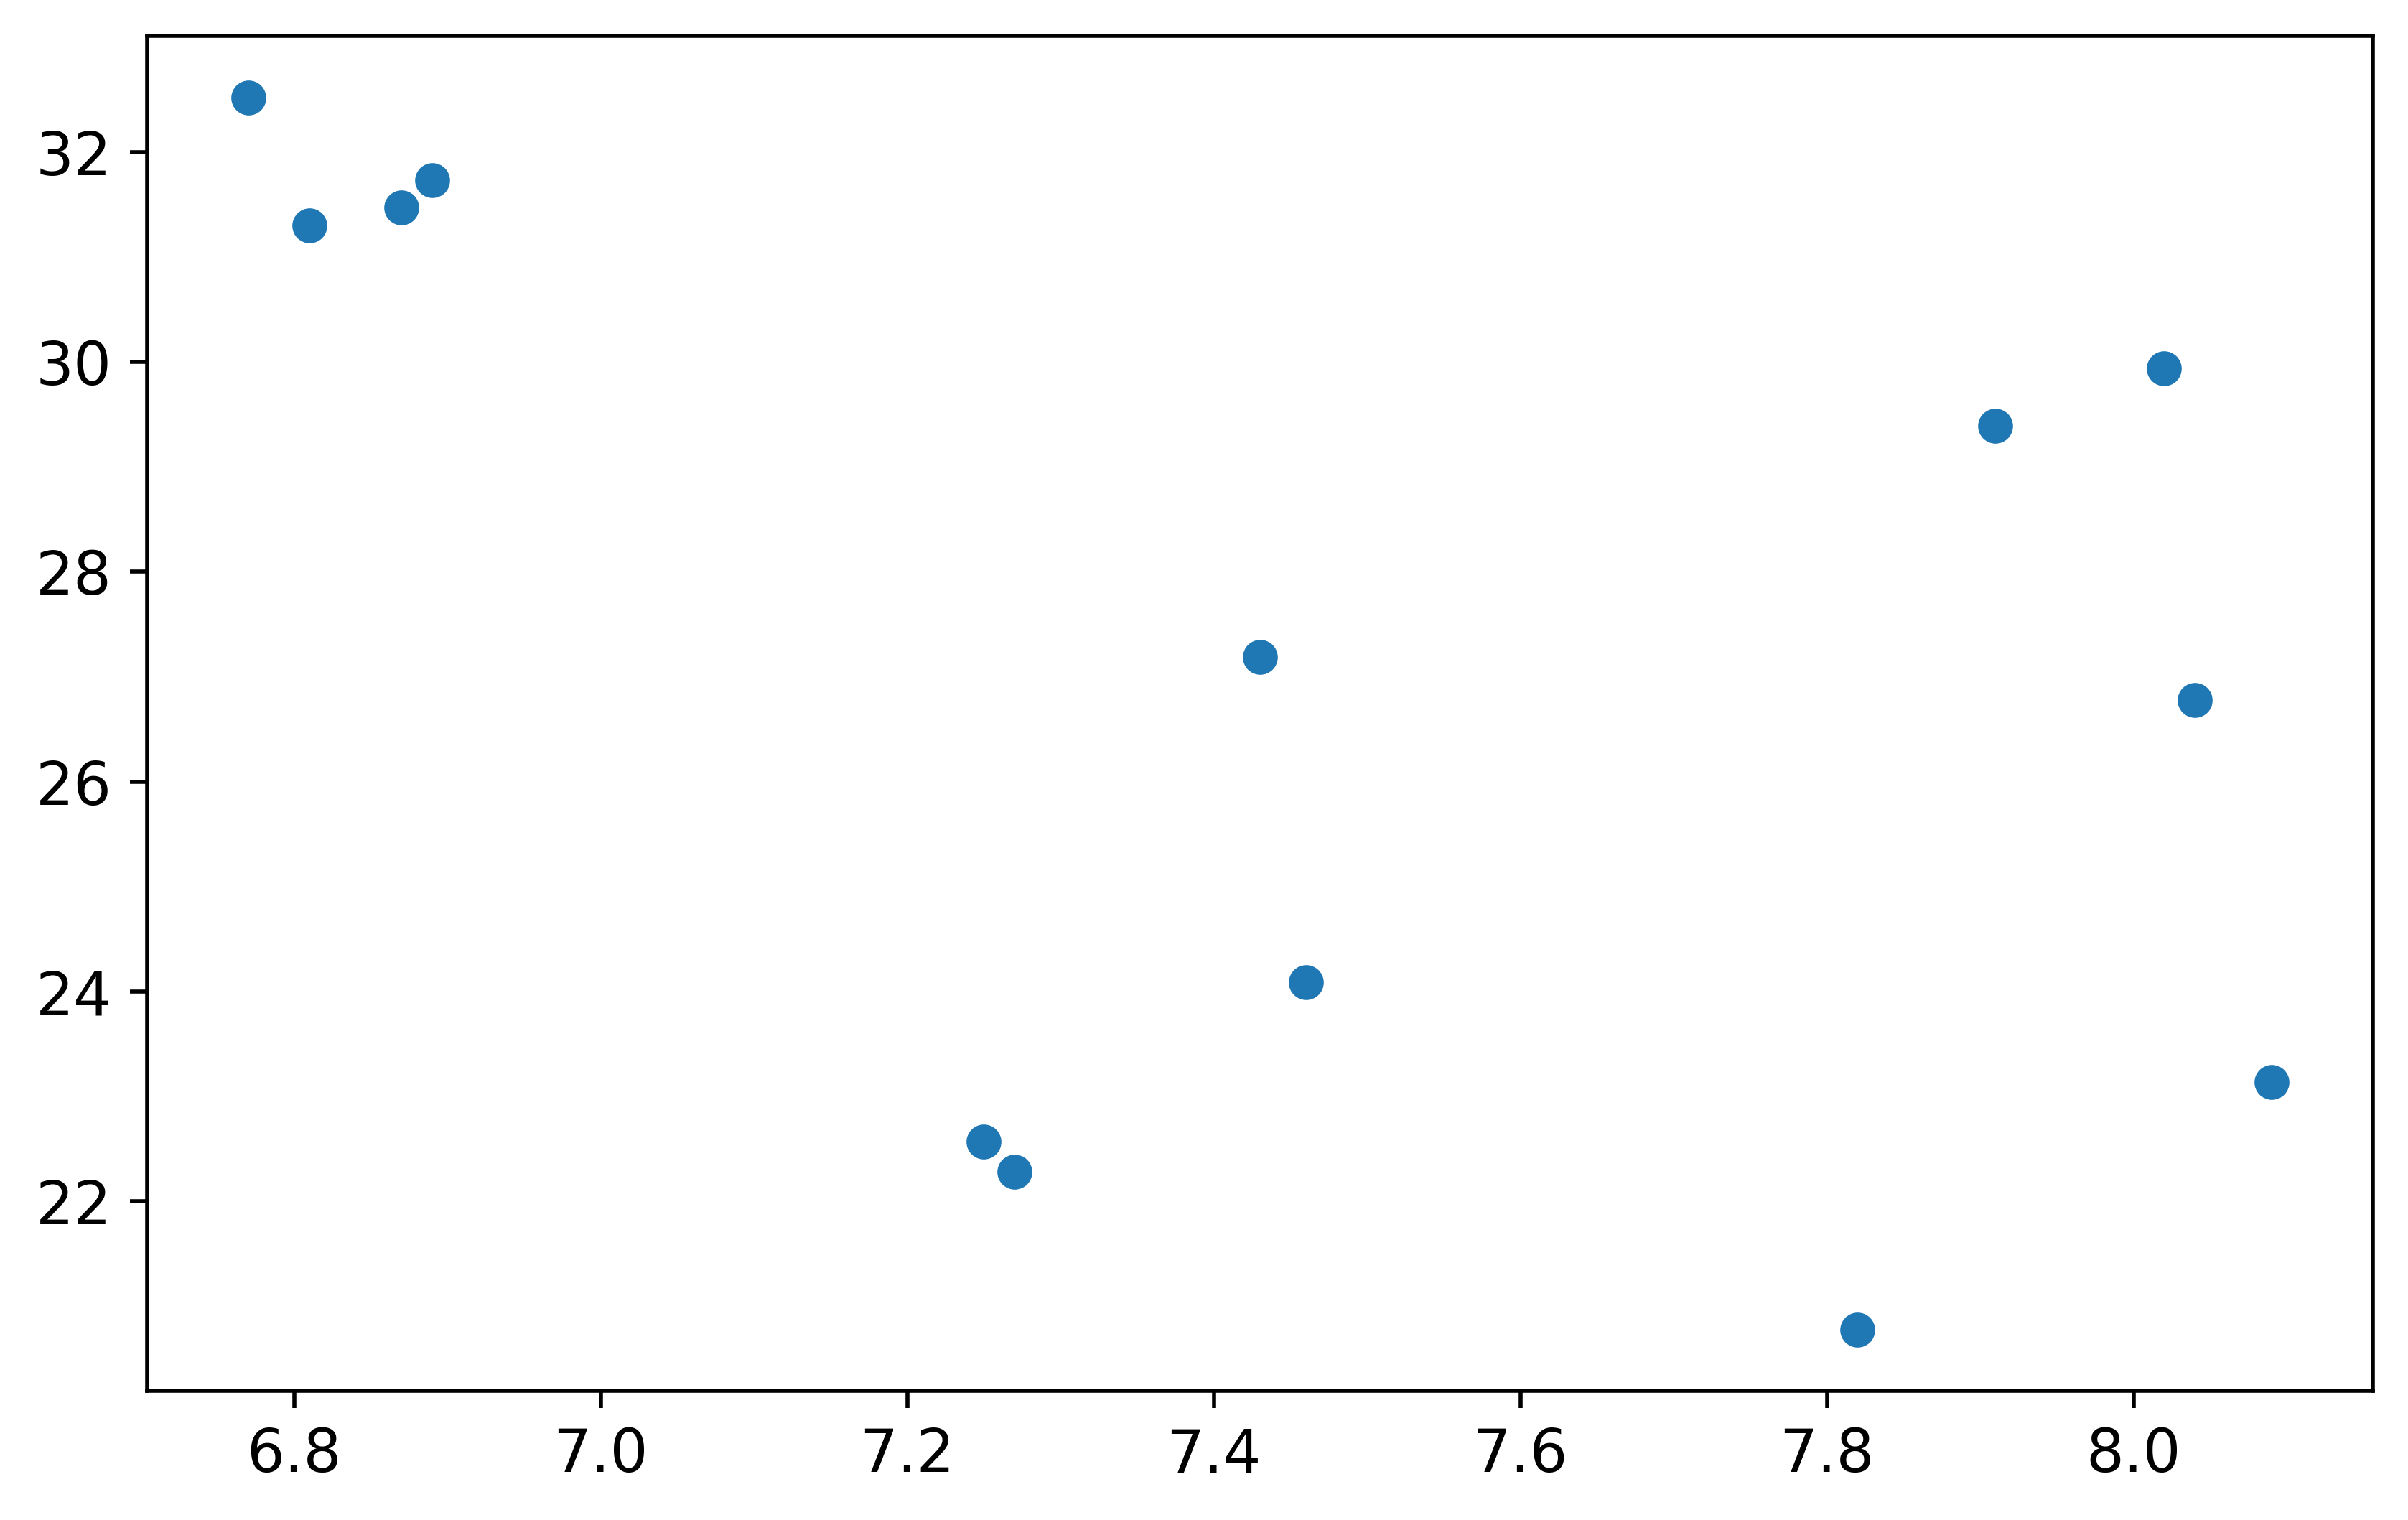

In [86]:
plt.scatter(c3,c2)
plt.show()